In [2]:
import pandas as pd

customer_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv", index_col = ["customer_id"], usecols = [0, 2, 3, 4])
customer_data.head(5)

,customer_zip_code_prefix,customer_city,customer_state
customer_id,,,
06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_zip_code_prefix  99441 non-null  int64 
 1   customer_city             99441 non-null  object
 2   customer_state            99441 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [4]:
customer_data.shape

(99441, 3)

In [5]:
customer_data["customer_city"].describe()

count         99441
unique         4119
top       sao paulo
freq          15540
Name: customer_city, dtype: object

In [6]:
city_has_null = customer_data["customer_city"].isna().any()
city_has_null

False

In [7]:
unique_city = customer_data["customer_city"].unique()
city_size = len(customer_data["customer_city"])
unique_city_size = len(unique_city)
city_count = customer_data["customer_city"].value_counts()
print(f"City size: {city_size}\n")
print(f"Unique city size: {unique_city_size}\n")
print(f"City count: {city_count}")

City size: 99441

Unique city size: 4119

City count: customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


In [8]:
zip_code_has_null = customer_data["customer_zip_code_prefix"].isna().any()
zip_code_has_null

False

In [9]:
unique_zip = customer_data["customer_zip_code_prefix"].unique()
zip_size = len(customer_data["customer_zip_code_prefix"])
unique_zip_size = len(unique_zip)
zip_count = customer_data["customer_zip_code_prefix"].value_counts()
print(f"Zip size: {zip_size}\n")
print(f"Unique Zip size: {unique_zip_size}\n")
print(f"Zip count: {zip_count}")

Zip size: 99441

Unique Zip size: 14994

Zip count: customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64


In [10]:
customer_state_des = customer_data["customer_state"].describe()
customer_state_des

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

In [11]:
customer_state_unq = customer_data["customer_state"].unique()
customer_state_unq

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
customer_state_cnt = customer_data["customer_state"].value_counts()
unique_state_list = np.array(list(zip(customer_state_cnt.index, customer_state_cnt.values)))
unique_state_list

array([['SP', '41746'],
       ['RJ', '12852'],
       ['MG', '11635'],
       ['RS', '5466'],
       ['PR', '5045'],
       ['SC', '3637'],
       ['BA', '3380'],
       ['DF', '2140'],
       ['ES', '2033'],
       ['GO', '2020'],
       ['PE', '1652'],
       ['CE', '1336'],
       ['PA', '975'],
       ['MT', '907'],
       ['MA', '747'],
       ['MS', '715'],
       ['PB', '536'],
       ['PI', '495'],
       ['RN', '485'],
       ['AL', '413'],
       ['SE', '350'],
       ['TO', '280'],
       ['RO', '253'],
       ['AM', '148'],
       ['AC', '81'],
       ['AP', '68'],
       ['RR', '46']], dtype='<U21')

In [14]:
# State Histogram

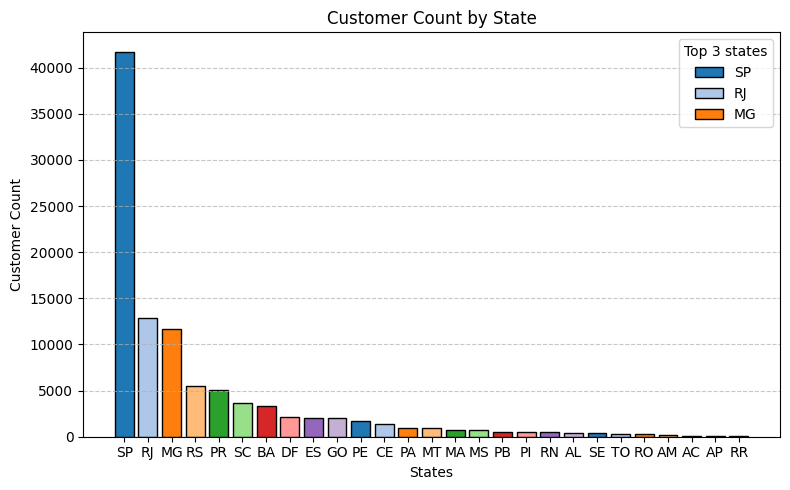

In [15]:
plt.figure(figsize=(8, 5))
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 10) for i in range(len(unique_state_list))]

for i in range(len(unique_state_list)):
    state = unique_state_list[i, 0]
    count = unique_state_list[i, 1].astype(int)
    color = colors[i]

    if i < 3:
        plt.bar(state, count, color = color, edgecolor = "black", label = state)
    else:
        plt.bar(state, count, color = color, edgecolor = "black")

plt.xlabel("States")
plt.ylabel("Customer Count")
plt.title("Customer Count by State")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title = "Top 3 states", loc = "upper right")
plt.tight_layout()
plt.show()

In [16]:
geoloc_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
geoloc_data.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geoloc_data.shape

(1000163, 5)

In [18]:
geoloc_data[geoloc_data["geolocation_zip_code_prefix"] == 56327]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [19]:
len(geoloc_data["geolocation_zip_code_prefix"].unique())

19015

In [20]:
geoloc_data["geolocation_lat"].max(), geoloc_data["geolocation_lat"].min(), 

(45.06593318269697, -36.6053744107061)

In [21]:
geoloc_data["geolocation_lng"].max(), geoloc_data["geolocation_lng"].min(), 

(121.10539381057764, -101.46676644931476)

In [22]:
geoloc_data = geoloc_data[(geoloc_data["geolocation_lat"] >= -33.7) & (geoloc_data["geolocation_lat"] <= 5.3)]
geoloc_data = geoloc_data[(geoloc_data["geolocation_lng"] >= -74) & (geoloc_data["geolocation_lng"] <= -34)]
geoloc_data.head(5), geoloc_data.shape

(   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 1                         1046       -23.546081       -46.644820   
 2                         1046       -23.546129       -46.642951   
 3                         1041       -23.544392       -46.639499   
 4                         1035       -23.541578       -46.641607   
 
   geolocation_city geolocation_state  
 0        sao paulo                SP  
 1        sao paulo                SP  
 2        sao paulo                SP  
 3        sao paulo                SP  
 4        sao paulo                SP  ,
 (1000121, 5))

In [23]:
geoloc_data.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [24]:
# Items dataset
items_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv", parse_dates = ["shipping_limit_date"])
items_data = items_data.sort_values(by="shipping_limit_date")
items_data.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
101394,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
90368,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96


In [25]:
items_data.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
items_data.shape

(112650, 7)

In [27]:
len(items_data["order_item_id"].unique())

21

In [28]:
# read the product id to see which are ordered most and least
items_describe = items_data["product_id"].describe()
items_describe

count                               112650
unique                               32951
top       aca2eb7d00ea1a7b8ebd4e68314663af
freq                                   527
Name: product_id, dtype: object

In [29]:
top_sell_product = items_describe.top
top_sell_product

'aca2eb7d00ea1a7b8ebd4e68314663af'

In [30]:
most_sold_product = items_data.loc[items_data["product_id"] == top_sell_product, ["shipping_limit_date", "price"]]
most_sold_product.head()

,shipping_limit_date,price
11393,2017-08-03 10:45:20,75.0
55353,2017-08-04 14:33:04,75.0
40977,2017-08-04 16:10:12,75.0
64255,2017-08-08 11:25:16,75.0
64256,2017-08-08 11:25:16,75.0


In [31]:
most_sold_product.max(), most_sold_product.min()

(shipping_limit_date    2018-08-23 04:29:47
 price                                109.9
 dtype: object,
 shipping_limit_date    2017-08-03 10:45:20
 price                                 69.9
 dtype: object)

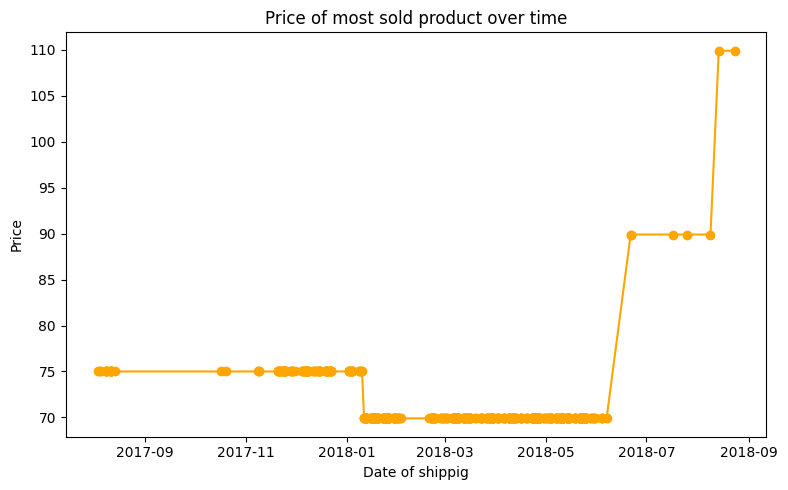

In [32]:
plt.figure(figsize = (8, 5))
plt.plot(most_sold_product["shipping_limit_date"], most_sold_product["price"], marker = "o", linestyle = "-", color = "orange")
plt.xlabel("Date of shippig")
plt.ylabel("Price")
plt.title("Price of most sold product over time")
plt.tight_layout()
plt.show()

In [33]:
top_10_sold_product = items_data["product_id"].value_counts().head()
top_10_sold_product

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

In [34]:
# Payment data analysis
payments_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
payments_data.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
payments_data.shape

(103886, 5)

In [36]:
payment_types_des = payments_data["payment_type"].describe()
payment_types_des

count          103886
unique              5
top       credit_card
freq            76795
Name: payment_type, dtype: object

In [37]:
payments_data["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [38]:
payments_data["payment_type"] = payments_data["payment_type"].str.replace("not_defined", "cash", case = False)

In [39]:
unique_payments_type = payments_data["payment_type"].unique()

In [40]:
payments_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [41]:
most_payments = np.array(list(zip(unique_payments_type, payments_data["payment_type"].value_counts().values)))

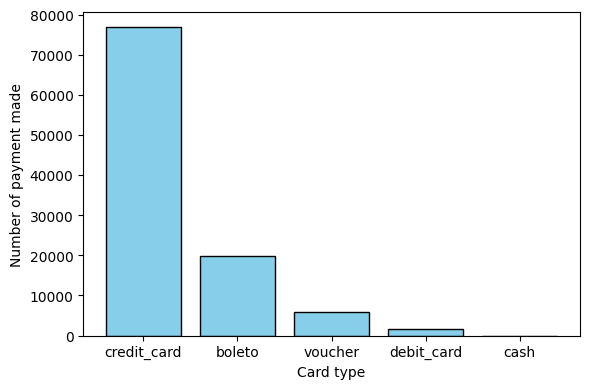

In [42]:
plt.figure(figsize = (6, 4))
plt.bar(most_payments[:, 0], most_payments[:, 1].astype(int), color = "skyblue", edgecolor = "black")
plt.xlabel("Card type")
plt.ylabel("Number of payment made")
plt.tight_layout()
plt.show()

In [43]:
# Review data analysis
reviews_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv", 
                           index_col = ["review_id"], 
                           parse_dates = ["review_creation_date", "review_answer_timestamp"])
reviews_data.head(5)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [44]:
reviews_data.shape

(99224, 6)

In [45]:
reviews_data = reviews_data.drop(["review_creation_date"], axis = 1)

In [46]:
rating_map = {
    5: 'Excellent',
    4: 'Good',
    3: 'Average',
    2: 'Poor',
    1: 'Very Poor'
}

In [47]:
reviews_data["ratings_label"] = reviews_data["review_score"].map(rating_map) 

In [48]:
idx = reviews_data.columns.get_loc("review_score")
label_col = reviews_data.pop("ratings_label")
reviews_data.insert(idx + 1, "ratings_label", label_col)

In [49]:
reviews_data.columns

Index(['order_id', 'review_score', 'ratings_label', 'review_comment_title',
       'review_comment_message', 'review_answer_timestamp'],
      dtype='object')

In [50]:
reviews_data["review_comment_message"] = reviews_data["review_comment_message"].fillna("N/A")
reviews_data["review_comment_title"] = reviews_data["review_comment_title"].fillna("N/A")

In [51]:
reviews_data.isnull().sum()

order_id                   0
review_score               0
ratings_label              0
review_comment_title       0
review_comment_message     0
review_answer_timestamp    0
dtype: int64

In [52]:
reviews_data.describe()

,review_score,review_answer_timestamp
count,99224.000000,99224
mean,4.086421,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-07 18:32:28
25%,4.000000,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-20 12:11:21.500000
max,5.000000,2018-10-29 12:27:35
std,1.347579,NaN


In [53]:
reviews_data.head(5)

,order_id,review_score,ratings_label,review_comment_title,review_comment_message,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Good,N/A,N/A,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Excellent,N/A,N/A,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Excellent,N/A,N/A,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Excellent,N/A,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Excellent,N/A,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53


In [54]:
unique_reviews_ratings_cnt = reviews_data["review_score"].astype(int).value_counts().sort_index()
unique_reviews_ratings_cnt

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

In [55]:
ratings_labels = [f"{x} stars" for x in unique_reviews_ratings_cnt.index]
ratings_labels

['1 stars', '2 stars', '3 stars', '4 stars', '5 stars']

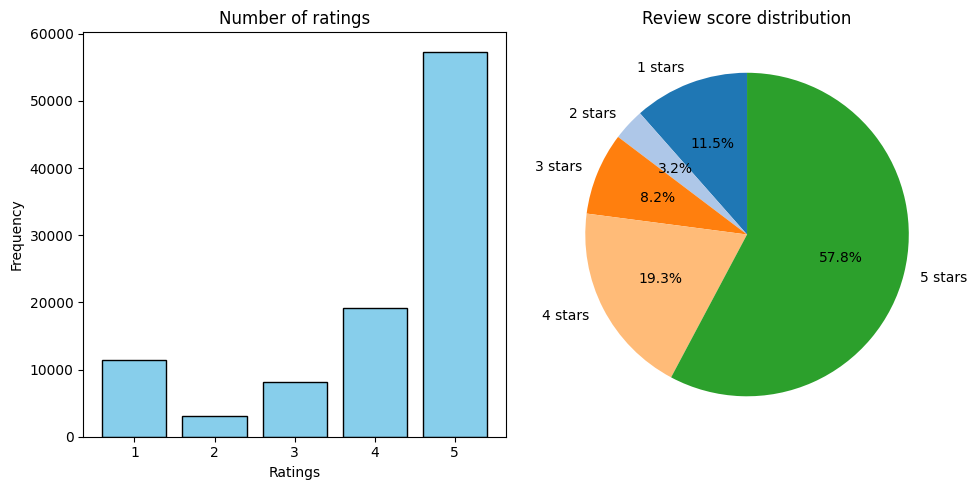

In [56]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].bar(unique_reviews_ratings_cnt.index, unique_reviews_ratings_cnt.values, color = "skyblue", edgecolor="black")
axes[0].set_xlabel("Ratings")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Number of ratings")
# Pie chart
axes[1].pie(unique_reviews_ratings_cnt.values, labels = ratings_labels, autopct = "%1.1f%%", startangle = 90, colors = plt.cm.tab20.colors)
axes[1].set_title("Review score distribution")
plt.tight_layout()
plt.show()

In [57]:
orders_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv",
                         index_col = "order_id", parse_dates = [
                             "order_purchase_timestamp", 
                             "order_approved_at", 
                             "order_delivered_carrier_date",
                             "order_delivered_customer_date",
                             "order_estimated_delivery_date"
                         ])
orders_data.head(5)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [58]:
orders_data.shape

(99441, 7)

In [59]:
orders_data.isna().sum()

customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [60]:
mask_unapproved = orders_data["order_approved_at"].isnull()
orders_data_unapproved_status = orders_data.loc[mask_unapproved, ["order_status"]]
orders_data_unapproved_status

,order_status
order_id,
00b1cb0320190ca0daa2c88b35206009,canceled
ed3efbd3a87bea76c2812c66a0b32219,canceled
df8282afe61008dc26c6c31011474d02,canceled
8d4c637f1accf7a88a4555f02741e606,canceled
7a9d4c7f9b068337875b95465330f2fc,canceled
...,...
5a00b4d35edffc56b825c3646a99ba9d,canceled
227c804e2a44760671a6a5697ea549e4,canceled
e49e7ce1471b4693482d40c2bd3ad196,canceled


In [61]:
orders_data["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [62]:
orders_data = orders_data[orders_data["order_status"] != "unavailable"]

In [63]:
orders_data["delivery_days_by_customer"] = (orders_data["order_delivered_customer_date"] - orders_data["order_approved_at"]).dt.days.fillna(-1).astype(int)
orders_data["delivery_days_estimated"] = (orders_data["order_estimated_delivery_date"] - orders_data["order_approved_at"]).dt.days.fillna(-1).astype(int)
orders_data.head(5)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days_by_customer,delivery_days_estimated
order_id,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12,17
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,26
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,26
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,12


In [64]:
orders_data.loc[
    (orders_data["order_status"] == "delivered") & 
    (orders_data["delivery_days_by_customer"] < 0),
    "order_delivered_customer_date"
] = orders_data["order_estimated_delivery_date"]

In [65]:
orders_data.loc[orders_data["order_status"] == "canceled", ["delivery_days_by_customer", "delivery_days_estimated"]] = 0

In [66]:
orders_data[(orders_data["order_status"] == "delivered") & (orders_data["delivery_days_by_customer"] < 0)].value_counts().sum()

68

In [67]:
orders_data = orders_data[
    ~(
        (orders_data["order_status"] == "delivered") &
        (orders_data["delivery_days_estimated"] < 0)
    )
]

In [68]:
orders_data = orders_data[
    ~(
        (orders_data["order_status"] == "delivered") &
        (orders_data["order_approved_at"].isna())
    )
]

In [69]:
mean_est_delivery_duration = orders_data["delivery_days_estimated"].mean()
max_est_delivery_duration = orders_data["delivery_days_estimated"].max()
min_est_delivery_duration = orders_data["delivery_days_estimated"].min()
mean_est_delivery_duration, max_est_delivery_duration, min_est_delivery_duration

(22.753015828037082, 153, -5)

In [70]:
delivery_gt_60 = orders_data[orders_data["delivery_days_by_customer"] > 60].value_counts().sum()
delivery_gt_60

282

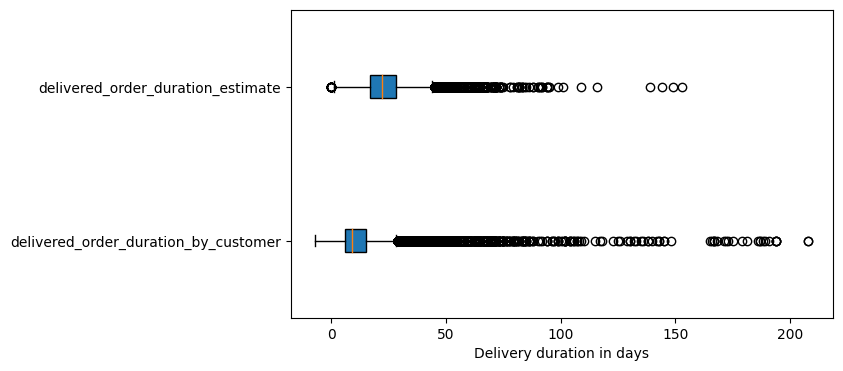

In [71]:
delivered_order_duration_by_cus = orders_data[orders_data["order_status"] == "delivered"]["delivery_days_by_customer"]
delivered_order_duration_est = orders_data[orders_data["order_status"] == "delivered"]["delivery_days_estimated"]
fix, axes = plt.subplots(figsize = (7, 4))
axes.set_xlabel("Delivery duration in days")
axes.boxplot(
    [delivered_order_duration_by_cus, delivered_order_duration_est], 
    patch_artist = True,
    vert = False,
    labels = ["delivered_order_duration_by_customer", "delivered_order_duration_estimate"])
plt.show()

In [72]:
orders_data.loc[(orders_data["order_status"] == "created"), "order_status"] = "canceled"

In [73]:
orders_data["order_approved_at"] = pd.to_datetime(orders_data["order_approved_at"], errors = "coerce")
orders_count_by_date = (
    orders_data
    .dropna(subset = ["order_approved_at"])
    .groupby(orders_data["order_approved_at"].dt.date)
    .size()
    .reset_index(name = "orders_count")
    .sort_values("order_approved_at")
)
orders_count_by_date

,order_approved_at,orders_count
0,2016-09-15,1
1,2016-10-04,20
2,2016-10-05,11
3,2016-10-06,107
4,2016-10-07,57
...,...,...
606,2018-08-26,70
607,2018-08-27,64
608,2018-08-28,56
609,2018-08-29,15


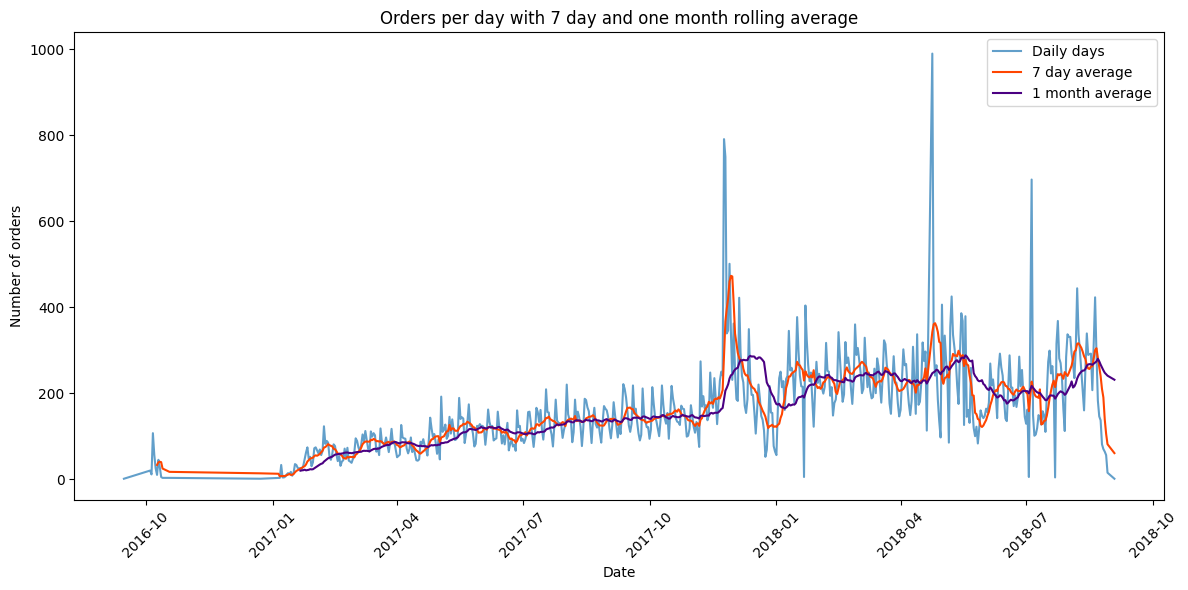

In [74]:
orders_count_by_date["rolling_avg_7day"] = orders_count_by_date["orders_count"].rolling(window = 7).mean()
orders_count_by_date["rolling_avg_1month"] = orders_count_by_date["orders_count"].rolling(window = 30).mean()
plt.figure(figsize = (12, 6))
plt.plot(orders_count_by_date["order_approved_at"], orders_count_by_date["orders_count"], label = "Daily days", alpha = 0.7)
plt.plot(orders_count_by_date["order_approved_at"], orders_count_by_date["rolling_avg_7day"], label = "7 day average", color = "orangered")
plt.plot(orders_count_by_date["order_approved_at"], orders_count_by_date["rolling_avg_1month"], label = "1 month average", color = "indigo")
plt.title("Orders per day with 7 day and one month rolling average")
plt.xlabel("Date")
plt.ylabel("Number of orders")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

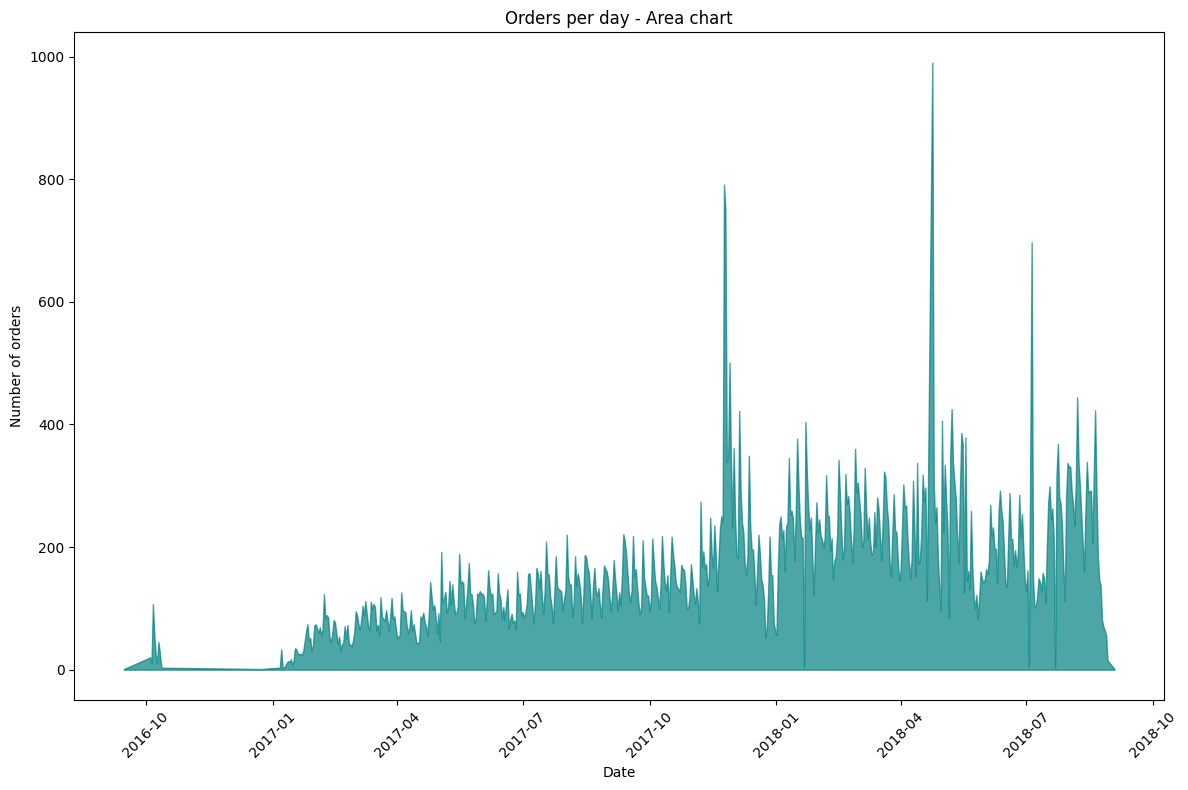

In [75]:
# Area chart
plt.figure(figsize = (12, 8))
plt.fill_between(orders_count_by_date["order_approved_at"], orders_count_by_date["orders_count"], color = "teal", alpha = 0.7)
plt.title("Orders per day - Area chart")
plt.xlabel("Date")
plt.ylabel("Number of orders")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

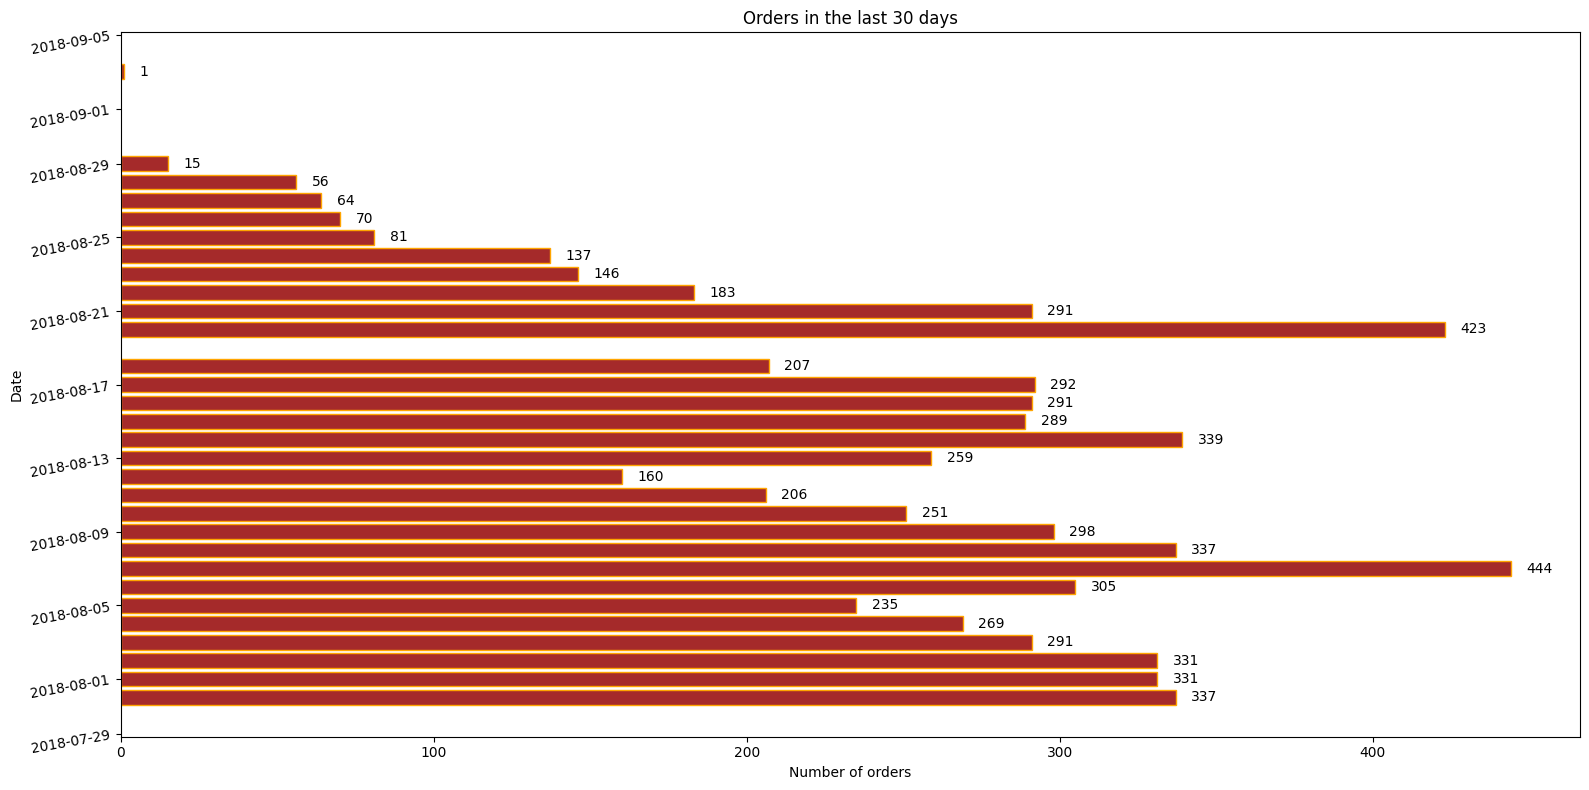

In [76]:
last_30 = orders_count_by_date.tail(30)
plt.figure(figsize = (16, 8))
plt.barh(y = last_30["order_approved_at"], width = last_30["orders_count"], color = "brown", edgecolor = "orange")
for index, value in enumerate(last_30["orders_count"]):
    plt.text(
        x = value + 5,
        y = last_30["order_approved_at"].iloc[index],
        s = str(value),
        va = "center"
    )
plt.title("Orders in the last 30 days")
plt.xlabel("Number of orders")
plt.ylabel("Date")
plt.yticks(rotation = 10)
plt.tight_layout()
plt.show()

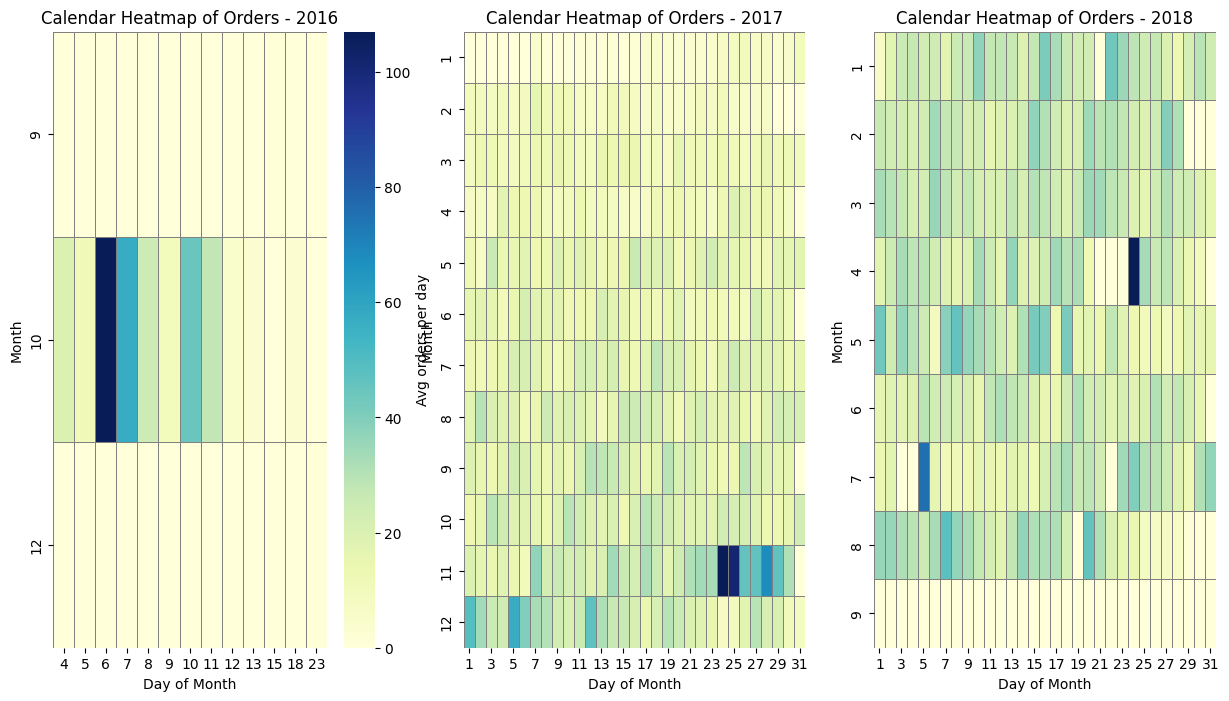

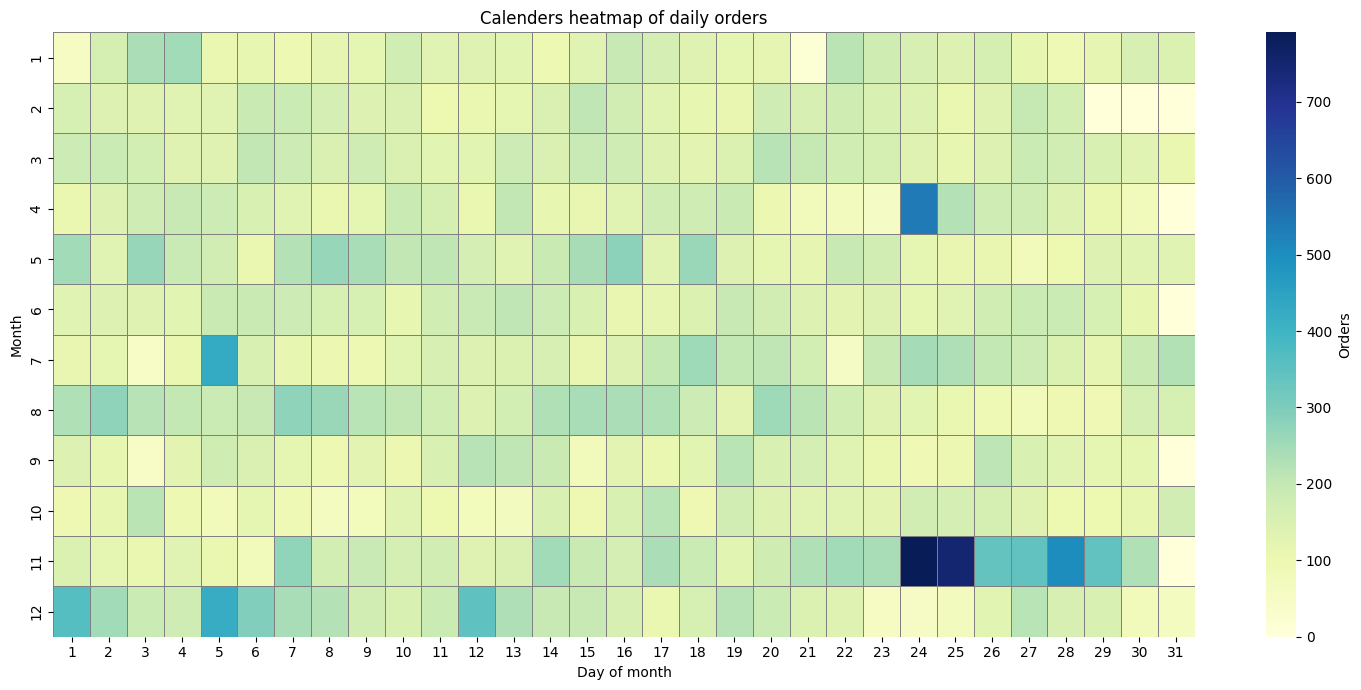

In [77]:
calender_df = orders_count_by_date.copy().drop(["rolling_avg_7day", "rolling_avg_1month"], axis = 1, inplace = False)
calender_df["order_approved_at"] = pd.to_datetime(calender_df['order_approved_at'], errors='coerce')
calender_df["year"] = calender_df["order_approved_at"].dt.year
calender_df["month"] = calender_df["order_approved_at"].dt.month
calender_df["day"] = calender_df["order_approved_at"].dt.day
unique_years = calender_df.year.unique()

fig, axes = plt.subplots(1, len(unique_years), figsize = (15, 8))
pivot_year = {}

for i in range(len(unique_years)):
    key = f"year_{unique_years[i]}"
    calender_df_yearly = calender_df[calender_df["year"] == unique_years[i]]
    pivot_year[key] = calender_df_yearly.pivot_table(index = "month", columns = "day", values = "orders_count", aggfunc = "mean", fill_value = 0)
    sns.heatmap(pivot_year[key], cmap = "YlGnBu", linewidths = 0.5, linecolor = "grey", ax = axes[i], cbar = (i == 0), cbar_kws = {"label": "Avg orders per day"})
    axes[i].set_title(f"Calendar Heatmap of Orders - {unique_years[i]}")
    axes[i].set_xlabel("Day of Month")
    axes[i].set_ylabel("Month")

pivot = calender_df.pivot_table(index = "month", columns = "day", values = "orders_count", aggfunc = "mean", fill_value = 0)
plt.figure(figsize = (15, 7))
sns.heatmap(pivot, cmap = "YlGnBu", linewidths = 0.5, linecolor = "grey", cbar_kws = {"label": "Orders"})
plt.title("Calenders heatmap of daily orders")
plt.xlabel("Day of month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

day_name
Monday       87
Tuesday      89
Wednesday    87
Thursday     89
Friday       88
Saturday     86
Sunday       85
Name: count, dtype: int64


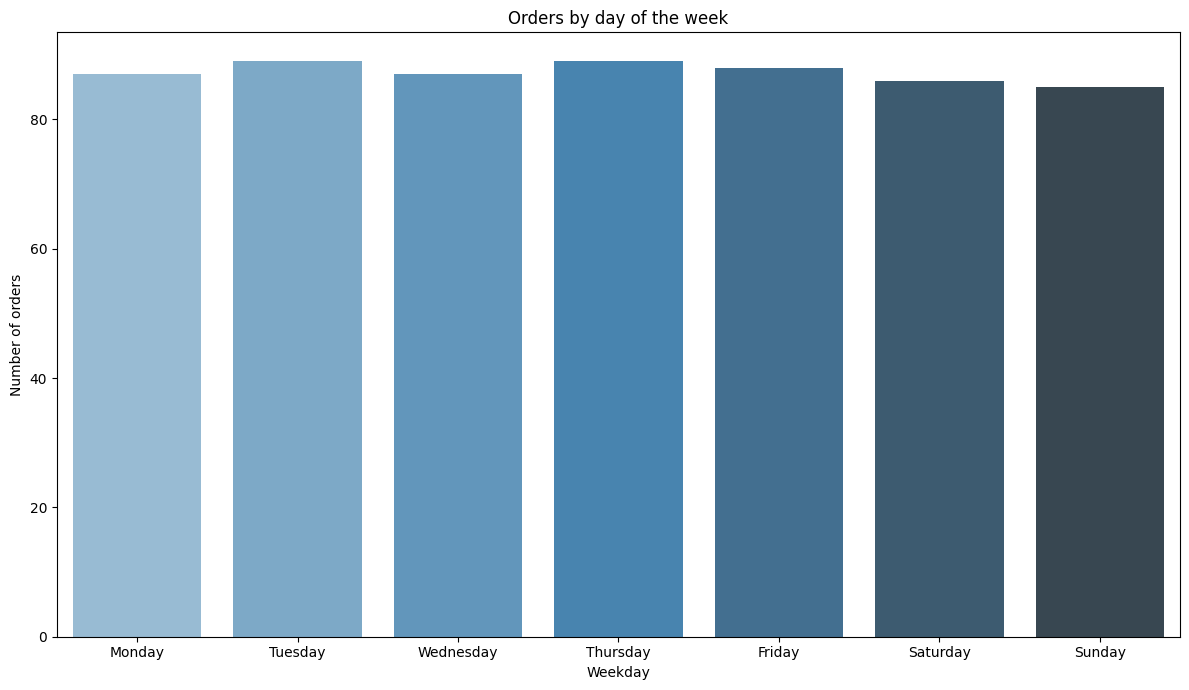

In [78]:
calender_df["day_name"] = calender_df["order_approved_at"].dt.day_name()
calender_df["day_num"] = calender_df["order_approved_at"].dt.weekday

calender_df["day_type"] = calender_df["day_name"].apply(lambda x: "weekend" if (x == "Saturday" or x == "Sunday")  else "weekday")
weekday_counts = calender_df["day_name"].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
print(weekday_counts)
plt.figure(figsize = (12, 7))
sns.barplot(x = weekday_counts.index, y = weekday_counts.values, palette = "Blues_d")
plt.title("Orders by day of the week")
plt.xlabel("Weekday")
plt.ylabel("Number of orders")
plt.tight_layout()
plt.show()

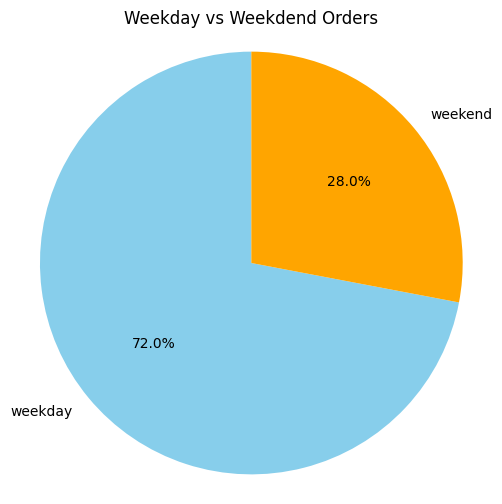

In [79]:
day_type_counts = calender_df["day_type"].value_counts()
plt.figure(figsize = (6, 6))
plt.pie(day_type_counts.values, labels = day_type_counts.index, autopct = "%1.1f%%", startangle = 90, colors = ["skyblue", "orange"])
plt.title("Weekday vs Weekdend Orders")
plt.axis("equal")
plt.show()

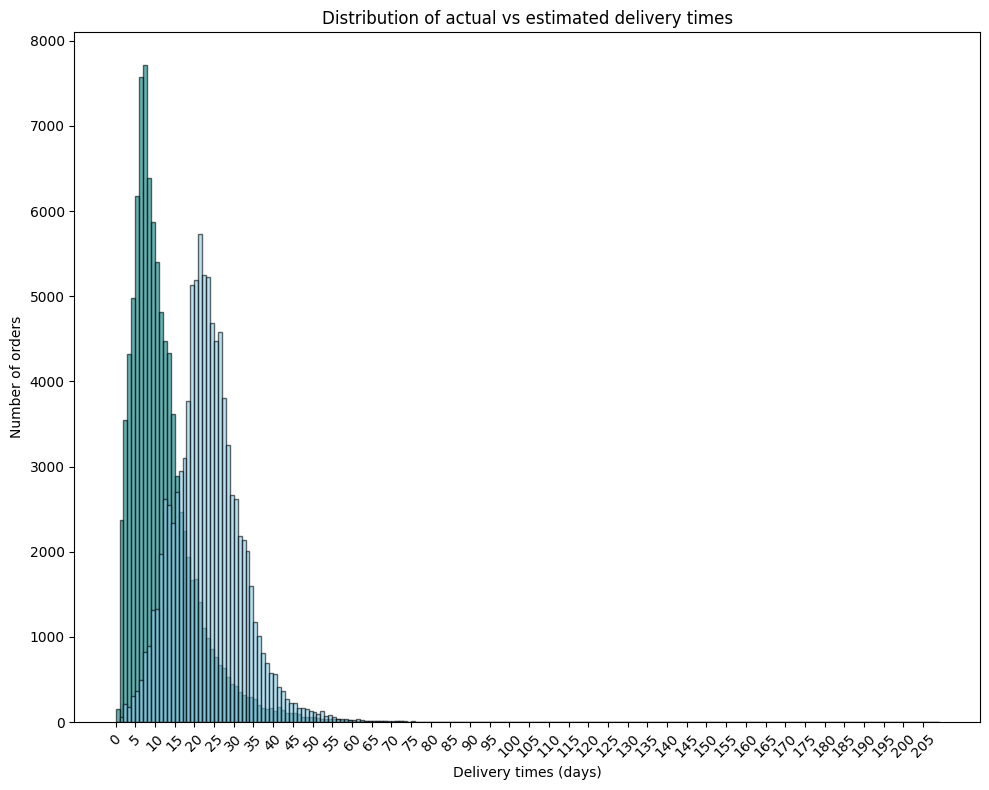

In [80]:
valid_deliveries = orders_data[(orders_data["order_status"] == "delivered") &
    (orders_data["delivery_days_by_customer"] >= 0) & (orders_data["delivery_days_estimated"] > 0)]

max_days = int(max(
    valid_deliveries["delivery_days_by_customer"].max(),
    valid_deliveries["delivery_days_estimated"].max()
))

plt.figure(figsize = (10, 8))
plt.hist(valid_deliveries["delivery_days_by_customer"], bins = range(0, max_days + 2), color = "teal", edgecolor = "black", alpha = 0.6, label = "Actual Delivery")
plt.hist(valid_deliveries["delivery_days_estimated"], bins = range(0, max_days + 2), color = "skyblue", edgecolor = "black", alpha = 0.6, label = "Estimated Delivery")
plt.xticks(np.arange(0, max_days + 1, 5), rotation = 45)
plt.title("Distribution of actual vs estimated delivery times")
plt.xlabel("Delivery times (days)")
plt.ylabel("Number of orders")
plt.tight_layout()
plt.show()

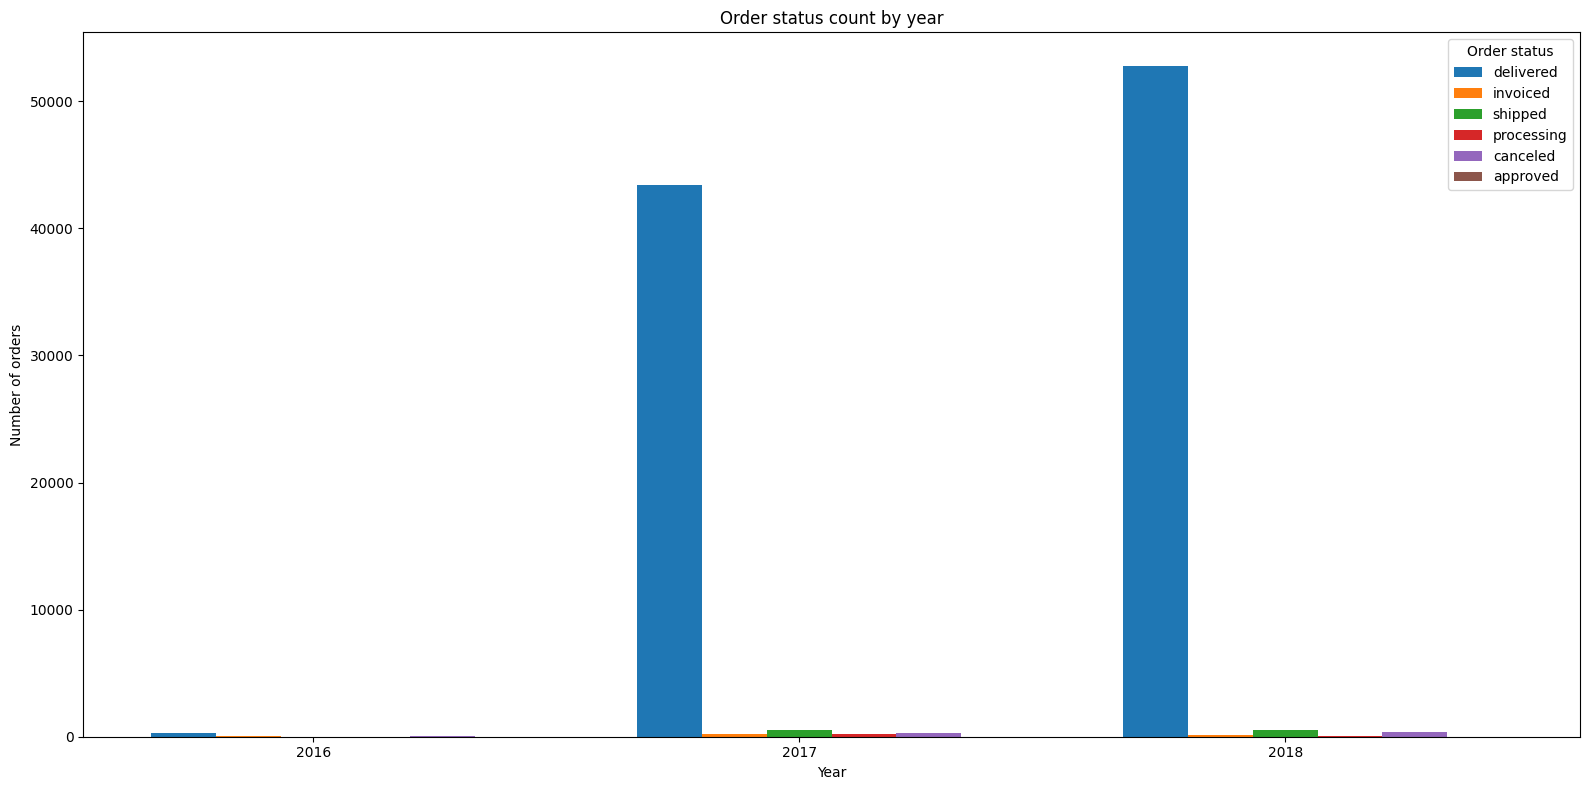

In [81]:
order_with_delivery_info = orders_data.copy()[["order_status", "order_purchase_timestamp"]]
order_with_delivery_info["year"] = order_with_delivery_info["order_purchase_timestamp"].dt.year
unique_years = sorted(order_with_delivery_info["year"].unique())
unique_status = order_with_delivery_info["order_status"].unique()

x = np.arange(len(unique_years))
width = 0.8 / len(unique_status)

plt.figure(figsize = (16, 8))

for i, status in enumerate(unique_status):
    counts = [
        len(order_with_delivery_info[(order_with_delivery_info["year"] == year) & (order_with_delivery_info["order_status"] == status)])
        for year in unique_years
    ]
    plt.bar(x + i * width, counts, width = width, label = status)
    
plt.xticks(ticks = x + (width * 2), labels = unique_years)
plt.xlabel("Year")
plt.ylabel("Number of orders")
plt.title("Order status count by year")
plt.legend(title = "Order status")
plt.tight_layout()
plt.show()

In [82]:
# Product Dataset
products_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv", index_col = "product_id")
products_data.head(5)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [83]:
products_data.shape

(32951, 8)

In [84]:
products_data.isna().sum()

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [85]:
products_data = products_data[products_data["product_category_name"].notnull()]
products_data.shape

(32341, 8)

In [86]:
products_data = products_data[products_data["product_weight_g"].notnull()]
products_data.shape

(32340, 8)

In [87]:
sellers_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv", index_col = "seller_id")
sellers_data.head(5)

,seller_zip_code_prefix,seller_city,seller_state
seller_id,,,
3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [88]:
sellers_data.shape, sellers_data.isna().sum()

((3095, 3),
 seller_zip_code_prefix    0
 seller_city               0
 seller_state              0
 dtype: int64)

In [89]:
category_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
category_data.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [90]:
category_data.shape, category_data.isna().sum()

((71, 2),
 product_category_name            0
 product_category_name_english    0
 dtype: int64)

In [91]:
geo = (
    geoloc_data.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]]
    .mean()
    .reset_index()
    .rename(columns = {"geolocation_zip_code_prefix": "customer_zip_code_prefix"})
)

In [92]:
merge_with_orders_data = (
    orders_data.reset_index().
    merge(items_data[["order_id", "product_id", "price", "freight_value"]], on = "order_id", how = "left").
    merge(products_data[["product_category_name"]], on = "product_id", how = "left").
    merge(customer_data[["customer_zip_code_prefix", "customer_city", "customer_state"]], on = "customer_id", how = "left").
    merge(payments_data[["order_id", "payment_type"]], on = "order_id", how = "left").
    merge(geo, on = "customer_zip_code_prefix", how = "left")
)
merge_with_orders_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days_by_customer,delivery_days_estimated,product_id,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state,payment_type,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12,17,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,47813,barreiras,BA,boleto,-12.177924,-44.660711
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,26,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,75265,vianopolis,GO,credit_card,-16.745150,-48.514783


In [93]:
merge_with_orders_data.shape

(117762, 20)

In [94]:
merge_with_orders_data.drop(columns = [
    "order_delivered_carrier_date", 
    "order_estimated_delivery_date", 
    "order_delivered_customer_date"], inplace = True)

In [95]:
merge_with_orders_data.isna().sum()

order_id                        0
customer_id                     0
order_status                    0
order_purchase_timestamp        0
order_approved_at             161
delivery_days_by_customer       0
delivery_days_estimated         0
product_id                    187
price                         187
freight_value                 187
product_category_name        1885
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
payment_type                    3
geolocation_lat               315
geolocation_lng               315
dtype: int64

In [96]:
merge_with_orders_data = merge_with_orders_data[merge_with_orders_data["product_id"].notnull()]

In [97]:
merge_with_orders_data[merge_with_orders_data["geolocation_lat"].isna()]["order_status"].value_counts()

order_status
delivered     299
shipped         7
canceled        5
invoiced        1
processing      1
Name: count, dtype: int64

In [98]:
merge_with_orders_data.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_days_by_customer,delivery_days_estimated,product_id,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state,payment_type,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12,17,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,47813,barreiras,BA,boleto,-12.177924,-44.660711
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9,26,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,75265,vianopolis,GO,credit_card,-16.745150,-48.514783
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,13,26,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,59296,sao goncalo do amarante,RN,credit_card,-5.774190,-35.271143
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2,12,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,9195,santo andre,SP,credit_card,-23.676370,-46.514627
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,16,22,060cb19345d90064d1015407193c233d,147.90,27.36,automotivo,86320,congonhinhas,PR,credit_card,-23.553522,-50.549924
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,-1,25,a1804276d9941ac0733cfd409f5206eb,49.90,16.05,NaN,98900,santa rosa,RS,credit_card,-27.865358,-54.470128
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,9,21,4520766ec412348b8d4caa5e8a18c464,59.99,15.17,automotivo,26525,nilopolis,RJ,credit_card,-22.805707,-43.423079


In [99]:
ten_most_ordered_category = merge_with_orders_data["product_category_name"].value_counts()[:10].to_frame().sort_values(by = "count", ascending = True)
ten_most_ordered_category

,count
product_category_name,
automotivo,4378
ferramentas_jardim,4573
telefonia,4719
relogios_presentes,6199
utilidades_domesticas,7355
informatica_acessorios,8082
moveis_decoracao,8739
esporte_lazer,8943
beleza_saude,9975


In [100]:
ten_most_ordered_city = merge_with_orders_data["customer_city"].value_counts()[:10].to_frame().sort_values(by = "count", ascending = True)
ten_most_ordered_city

,count
customer_city,
sao bernardo do campo,1112
guarulhos,1401
salvador,1527
porto alegre,1653
campinas,1735
curitiba,1808
brasilia,2457
belo horizonte,3245
rio de janeiro,8200


In [101]:
ten_most_ordered_category.count

<bound method DataFrame.count of                         count
product_category_name        
automotivo               4378
ferramentas_jardim       4573
telefonia                4719
relogios_presentes       6199
utilidades_domesticas    7355
informatica_acessorios   8082
moveis_decoracao         8739
esporte_lazer            8943
beleza_saude             9975
cama_mesa_banho         11820>

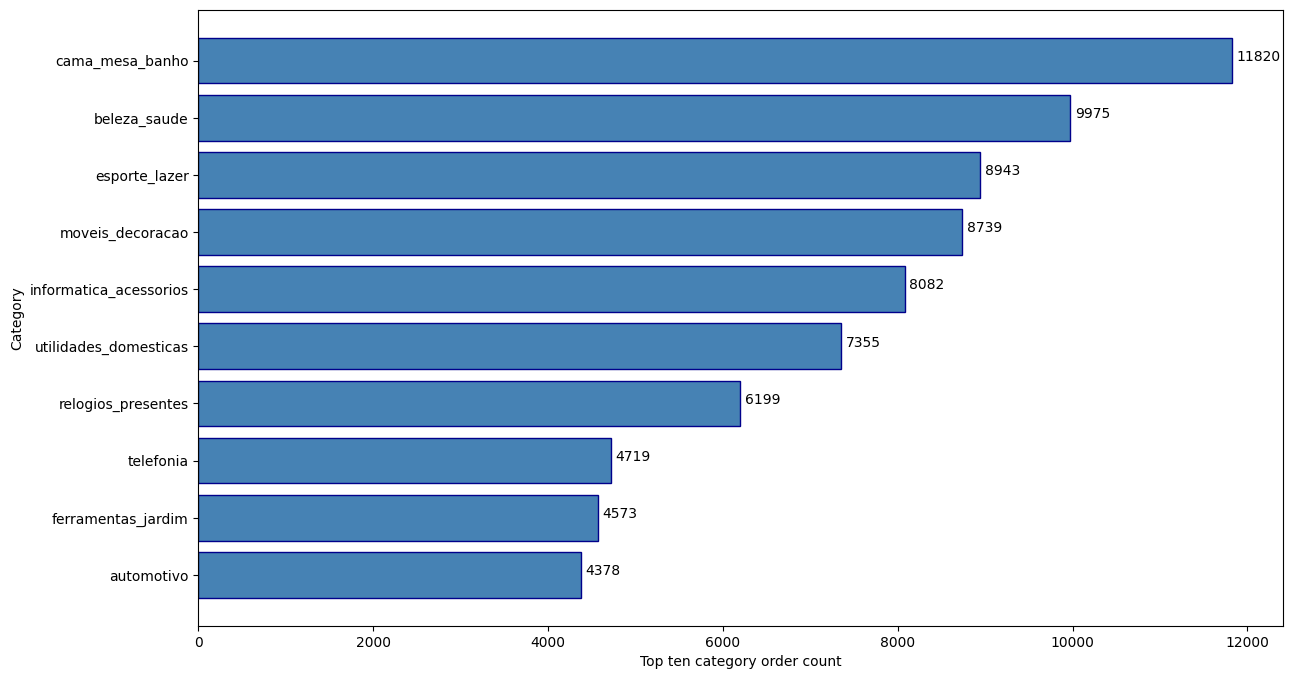

In [102]:
plt.figure(figsize = (14, 8))
plt.barh(y = ten_most_ordered_category.index, width=ten_most_ordered_category["count"], color = "steelblue", edgecolor = "darkblue")
for index, value in enumerate(ten_most_ordered_category["count"]):
    plt.text(value + 50, index, str(value))
plt.xlabel("Top ten category order count")
plt.ylabel("Category")
plt.show()

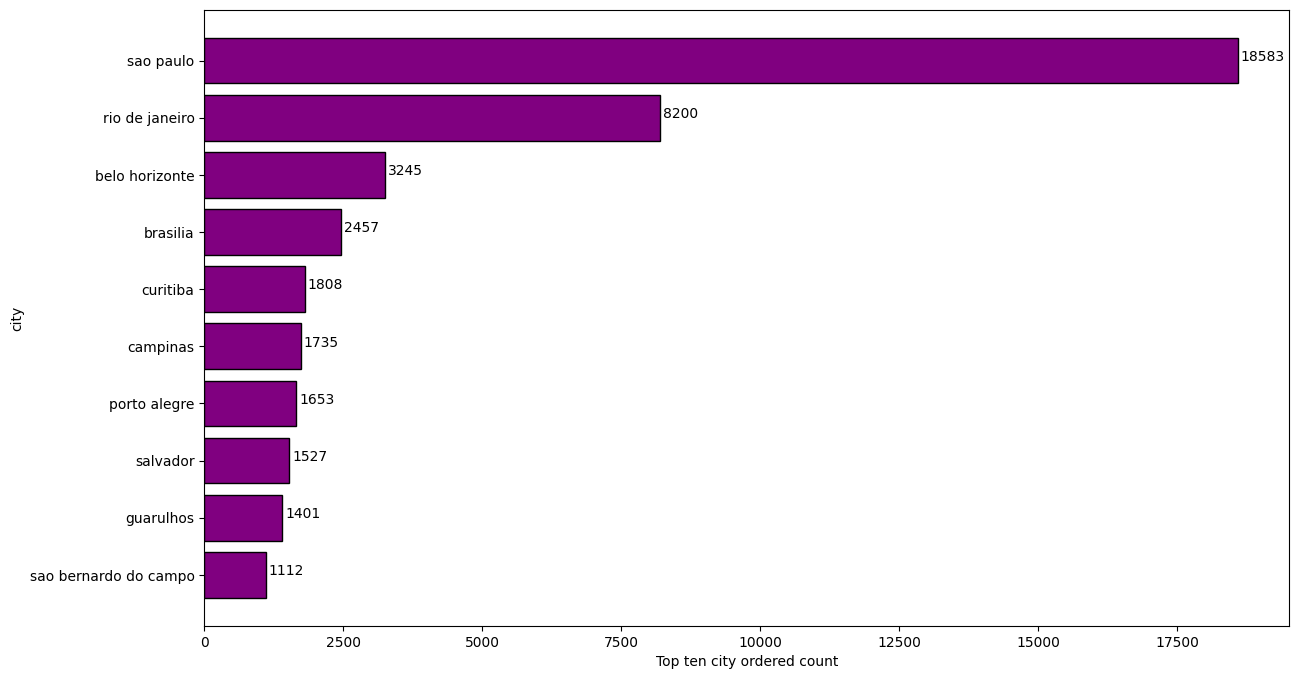

In [103]:
plt.figure(figsize = (14, 8))
plt.barh(y = ten_most_ordered_city.index, width = ten_most_ordered_city["count"], color = "purple", edgecolor = "black")
for index, value in enumerate(ten_most_ordered_city["count"]):
    plt.text(value + 50, index, value)

plt.xlabel("Top ten city ordered count")
plt.ylabel("city")
plt.show()

In [104]:
# Average delivery time per city
def average_delivery_time_per_city():
    df = merge_with_orders_data.copy()
    df = df.dropna(subset = ["customer_city"])
    df = df[df["delivery_days_by_customer"] >= 0]
    avg_delivery_by_city = df.groupby("customer_city")["delivery_days_by_customer"].mean().astype(int).reset_index()
    avg_delivery_by_city = avg_delivery_by_city.sort_values("delivery_days_by_customer", ascending = False)
    return avg_delivery_by_city

avg_delivery_time = average_delivery_time_per_city()
avg_delivery_time

,customer_city,delivery_days_by_customer
2526,novo brasil,148
789,capinzal do norte,108
24,adhemar de barros,96
3246,santa cruz de goias,85
230,arace,85
...,...,...
1034,contenda,3
3975,vargem alegre,2
1670,iomere,2
641,caibate,2


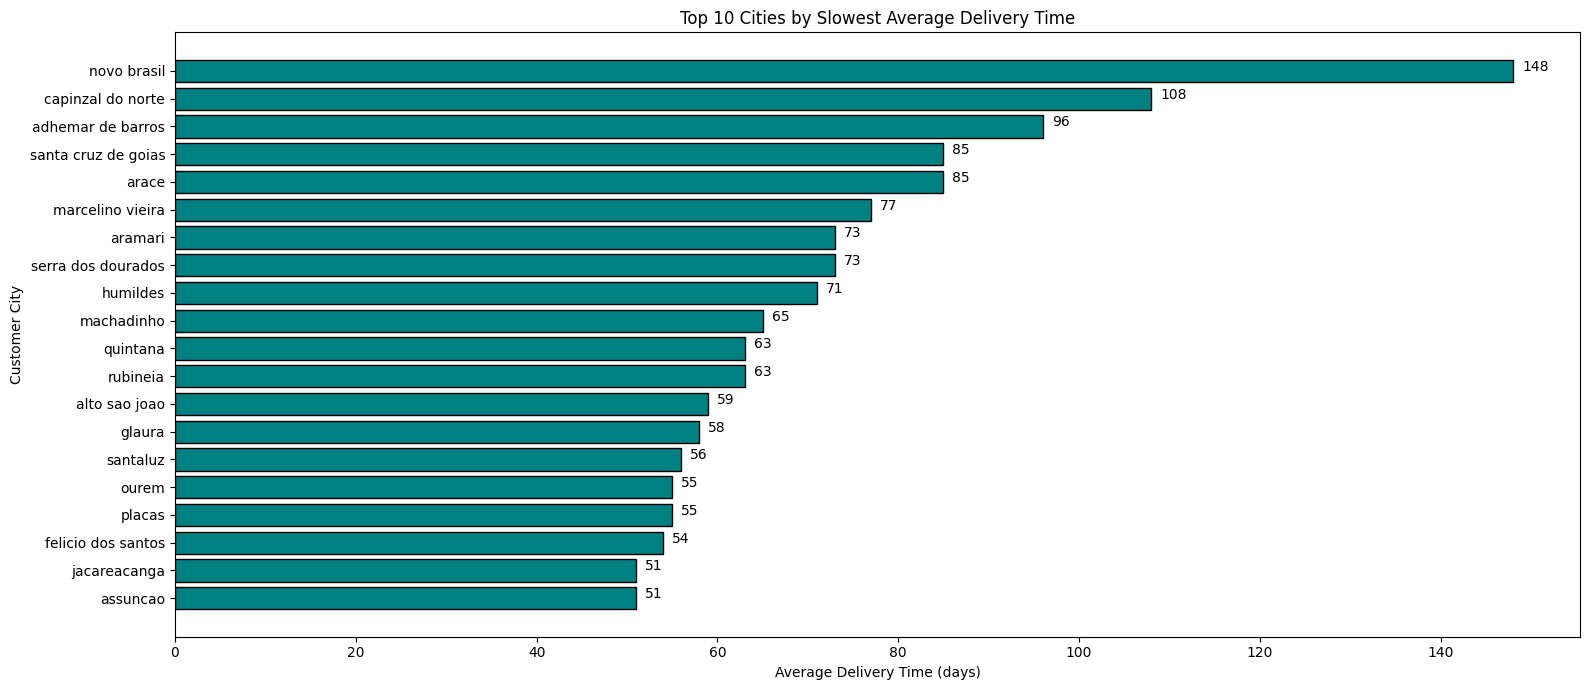

In [105]:
top_cities = avg_delivery_time.head(20)
plt.figure(figsize = (16, 7))
plt.barh(top_cities["customer_city"], top_cities["delivery_days_by_customer"], color="teal", edgecolor = "black")
for index, value in enumerate(top_cities["delivery_days_by_customer"]):
    plt.text(value + 1, index, value)
plt.xlabel("Average Delivery Time (days)")
plt.ylabel("Customer City")
plt.title("Top 10 Cities by Slowest Average Delivery Time")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

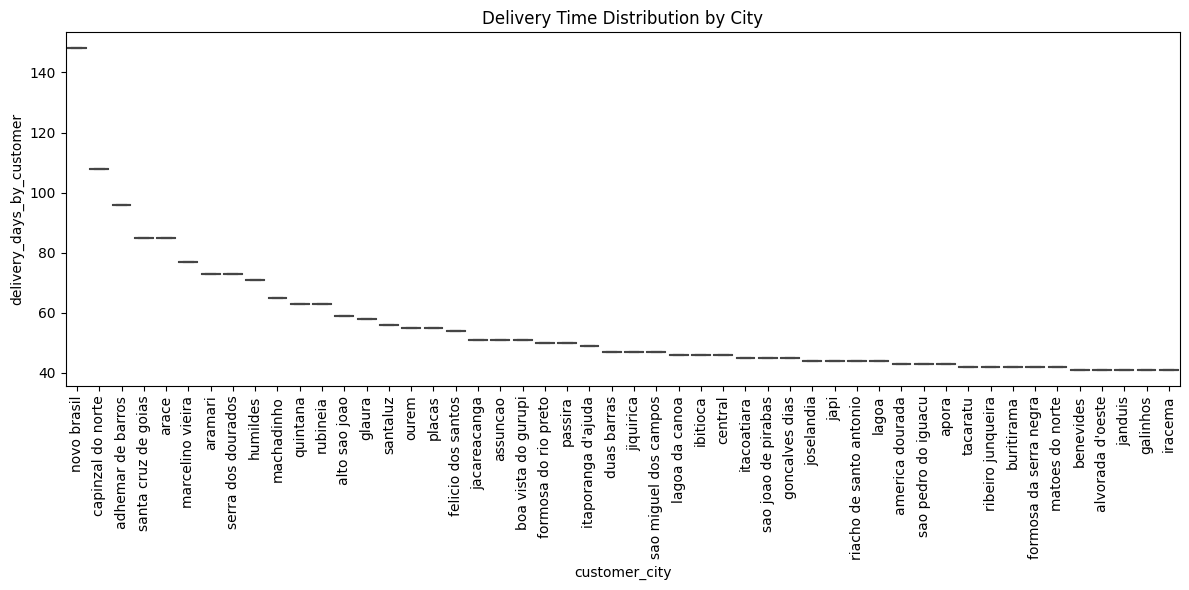

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "customer_city", y = "delivery_days_by_customer", data = avg_delivery_time.head(50))
plt.xticks(rotation = 90)
plt.title("Delivery Time Distribution by City")
plt.tight_layout()
plt.show()

In [107]:
merge_with_orders_data = (
    merge_with_orders_data.merge(reviews_data.reset_index()[["order_id", "review_score"]], on = "order_id", how = "left")
)
merge_with_orders_data["review_score"].fillna(0)
merge_with_orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_days_by_customer,delivery_days_estimated,product_id,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state,payment_type,geolocation_lat,geolocation_lng,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12,17,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,47813,barreiras,BA,boleto,-12.177924,-44.660711,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9,26,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,75265,vianopolis,GO,credit_card,-16.745150,-48.514783,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118276,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,22,23,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,11722,praia grande,SP,credit_card,-24.001500,-46.449864,4.0
118277,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,24,30,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos_2,45920,nova vicosa,BA,credit_card,-17.898358,-39.373630,5.0
118278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,17,37,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,28685,japuiba,RJ,credit_card,-22.562825,-42.694574,2.0
118279,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,17,37,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,28685,japuiba,RJ,credit_card,-22.562825,-42.694574,2.0


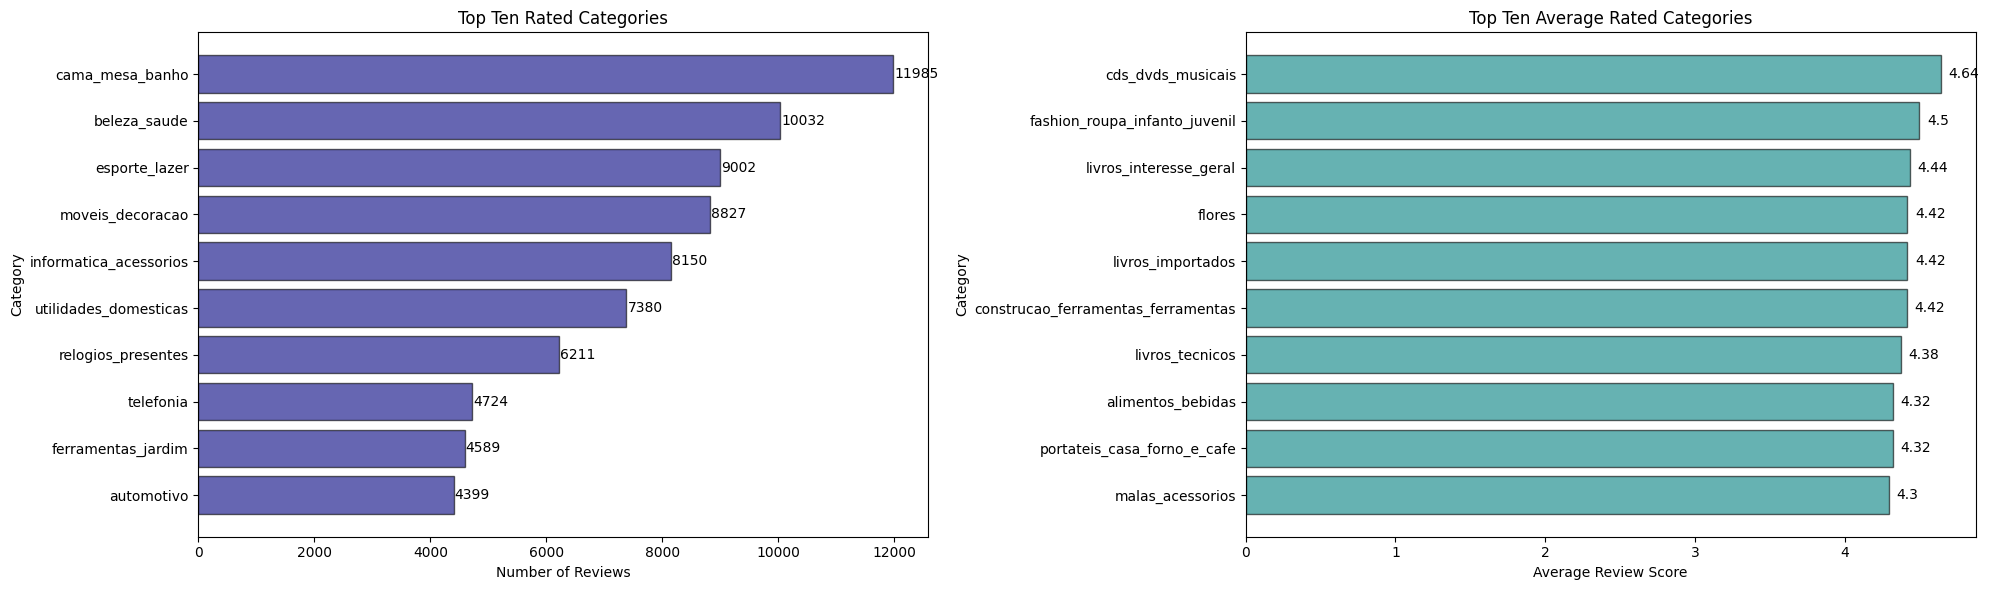

In [108]:
# top 10 reviewed categories
# top_ten_rated_categories = merge_with_orders_data[""]
group_rewiew = (
    merge_with_orders_data.groupby("product_category_name")[["review_score"]]
    .size()
    .reset_index(name = "review_count")
    .sort_values("review_count", ascending = False)
)

mean_group_rewiew = (
    merge_with_orders_data.groupby("product_category_name")[["review_score"]]
    .mean()
    .sort_values("review_score", ascending = False)
    .reset_index()
)

top_ten_rated_categories = group_rewiew.head(10)
top_ten_avg_score_categories = mean_group_rewiew.head(10)

fig, axes = plt.subplots(1, 2, figsize = (20, 6))

axes[0].barh(
    y=top_ten_rated_categories["product_category_name"],
    width=top_ten_rated_categories["review_count"],
    color="navy",
    edgecolor="black",
    alpha=0.6
)

for index, value in enumerate(top_ten_rated_categories["review_count"]):
    axes[0].text(value + 20, index, str(value), va="center")

axes[0].set_title("Top Ten Rated Categories")
axes[0].set_xlabel("Number of Reviews")
axes[0].set_ylabel("Category")
axes[0].invert_yaxis()

# Right chart: Top 10 by average score
axes[1].barh(
    y=top_ten_avg_score_categories["product_category_name"],
    width=top_ten_avg_score_categories["review_score"],
    color="teal",
    edgecolor="black",
    alpha=0.6
)

for index, value in enumerate(top_ten_avg_score_categories["review_score"]):
    axes[1].text(value + 0.05, index, str(round(value, 2)), va="center")

axes[1].set_title("Top Ten Average Rated Categories")
axes[1].set_xlabel("Average Review Score")
axes[1].set_ylabel("Category")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [109]:
geo

,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19005,99960,-27.953722,-52.025511
19006,99965,-28.183372,-52.039850
19007,99970,-28.343766,-51.874689
19008,99980,-28.389129,-51.843836


In [110]:
import folium
from folium.plugins import MarkerCluster

brazil_map = folium.Map(location = [-14.2350, -51.9253], zoom_start = 4)
marker_cluster = MarkerCluster().add_to(brazil_map)

for _, row in merge_with_orders_data.dropna(subset = ["geolocation_lat", "geolocation_lng"]).iterrows():
    folium.Marker(
        location = [row["geolocation_lat"], row["geolocation_lng"]],
        popup = f"Customer ID: {row['customer_id']}"
    ).add_to(marker_cluster)

brazil_map.save("customer_density_map.html")

In [111]:
customer_state_cnt.index

Index(['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF', 'ES', 'GO', 'PE', 'CE',
       'PA', 'MT', 'MA', 'MS', 'PB', 'PI', 'RN', 'AL', 'SE', 'TO', 'RO', 'AM',
       'AC', 'AP', 'RR'],
      dtype='object', name='customer_state')

In [112]:
region_map = {
    # Southeast
    "SP": "Southeast", "RJ": "Southeast", "MG": "Southeast", "ES": "Southeast",

    # South
    "RS": "South", "PR": "South", "SC": "South",

    # Northeast
    "BA": "Northeast", "PE": "Northeast", "CE": "Northeast", "MA": "Northeast",
    "PB": "Northeast", "PI": "Northeast", "RN": "Northeast", "AL": "Northeast",
    "SE": "Northeast",

    # Central-West
    "DF": "Central-West", "GO": "Central-West", "MT": "Central-West", "MS": "Central-West",
    "TO": "Central-West",  # Sometimes also considered North

    # North
    "PA": "North", "AM": "North", "AC": "North", "RO": "North",
    "RR": "North", "AP": "North"
}

merged_copy = merge_with_orders_data.copy()
merged_copy["region"] = merged_copy["customer_state"].map(region_map)

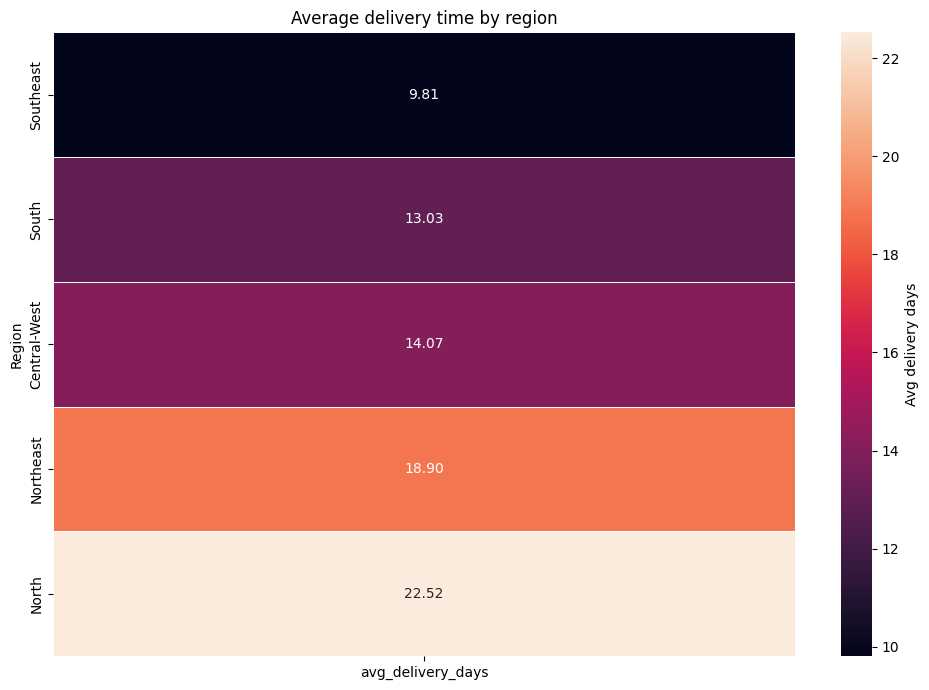

In [113]:
delivered = merged_copy[merged_copy["order_status"] == "delivered"]

region_delivery = delivered.groupby("region").agg(
    avg_delivery_days = ("delivery_days_by_customer", "mean"),
    total_orders = ("order_id", "count")
).reset_index()

region_delivery = region_delivery.sort_values(by = "avg_delivery_days", ascending = True)
# Heatmap
plt.figure(figsize = (10, 7))

heat_data = region_delivery.set_index("region")[["avg_delivery_days"]]
sns.heatmap(heat_data, annot = True, fmt = ".2f", linewidth = 0.5, cbar_kws = {"label": "Avg delivery days"})

plt.title("Average delivery time by region")
plt.xlabel("")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [114]:
merged_copy = (
    merged_copy.merge(
        payments_data[["order_id", "payment_value"]], on = "order_id", how = "left"
    )
)
merged_copy.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_days_by_customer,delivery_days_estimated,product_id,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state,payment_type,geolocation_lat,geolocation_lng,review_score,region,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161,4.0,Southeast,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161,4.0,Southeast,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,credit_card,-23.576983,-46.587161,4.0,Southeast,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,2.00
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,18.59
6,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,18.12
7,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,2.00
8,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,8,15,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,3149,sao paulo,SP,voucher,-23.576983,-46.587161,4.0,Southeast,18.59
9,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12,17,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,47813,barreiras,BA,boleto,-12.177924,-44.660711,4.0,Northeast,141.46


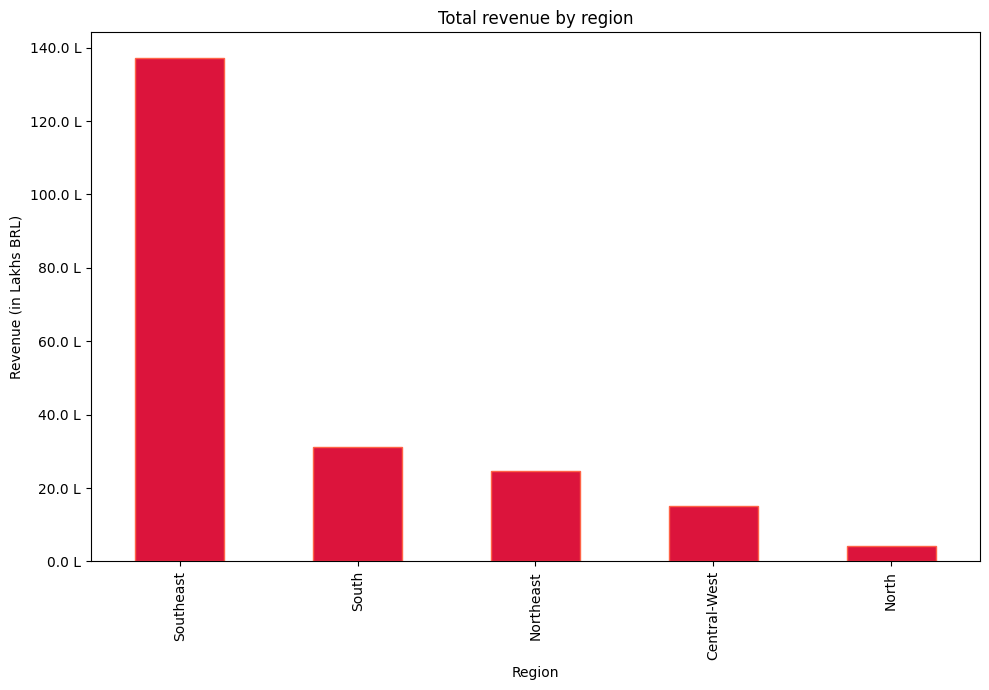

In [115]:
# # revenue by region
from matplotlib.ticker import FuncFormatter

revenue_by_region = merged_copy.groupby("region")["payment_value"].sum().sort_values(ascending = False)

def to_lacs(x, _):
    return f"{x / 1e5:.1f} L"

plt.figure(figsize = (10, 7))
ax = (revenue_by_region).plot(kind = "bar", color = "crimson", edgecolor = "tomato")

ax.yaxis.set_major_formatter(FuncFormatter(to_lacs))

plt.title("Total revenue by region")
plt.ylabel("Revenue (in Lakhs BRL)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [116]:
#  RFM Analysis in Pandas
rfm_data = orders_data.copy().merge(payments_data[["order_id", "payment_value"]], on = "order_id")

snapshot_date = rfm_data["order_approved_at"].max()

rfm = rfm_data.groupby("customer_id").agg({
        "order_approved_at": lambda x: (snapshot_date - x.max()).days,
        "order_id": "nunique",
        "payment_value": "sum"
    }).reset_index().rename(columns = {
        "order_approved_at": "Recency",
        "order_id": "Frequency",
        "payment_value": "Monetary"
    })


In [117]:
# R = Recency Rank - How recently a customer placed their last order.
# F = Frequency Rank - How often a customer placed orders.
# M = Monetary Rank - How much a customer has spent in total.
rfm["R_rank"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_rank"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm["M_rank"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [118]:
rfm.tail(10)

,customer_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
98801,fff89c8ed4fcf69a823c1d149e429a0b,261.0,1,44.10,3,5,1
98802,fff906ecb75de5809be384e0f8d65e45,173.0,1,102.13,4,5,3
98803,fff93c1da78dafaaa304ff032abc6205,82.0,1,242.48,5,5,5
98804,fffa0238b217e18a8adeeda0669923a3,356.0,1,43.72,2,5,1
98805,fffb97495f78be80e2759335275df2aa,230.0,1,61.01,3,5,2
98806,fffcb937e9dd47a13f05ecb8290f4d3e,170.0,1,91.91,4,5,3
98807,fffecc9f79fd8c764f843e9951b11341,158.0,1,81.36,4,5,2
98808,fffeda5b6d849fbd39689bb92087f431,104.0,1,63.13,4,5,2
98809,ffff42319e9b2d713724ae527742af25,82.0,1,214.13,5,5,5
98810,ffffa3172527f765de70084a7e53aae8,366.0,1,45.50,2,5,1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


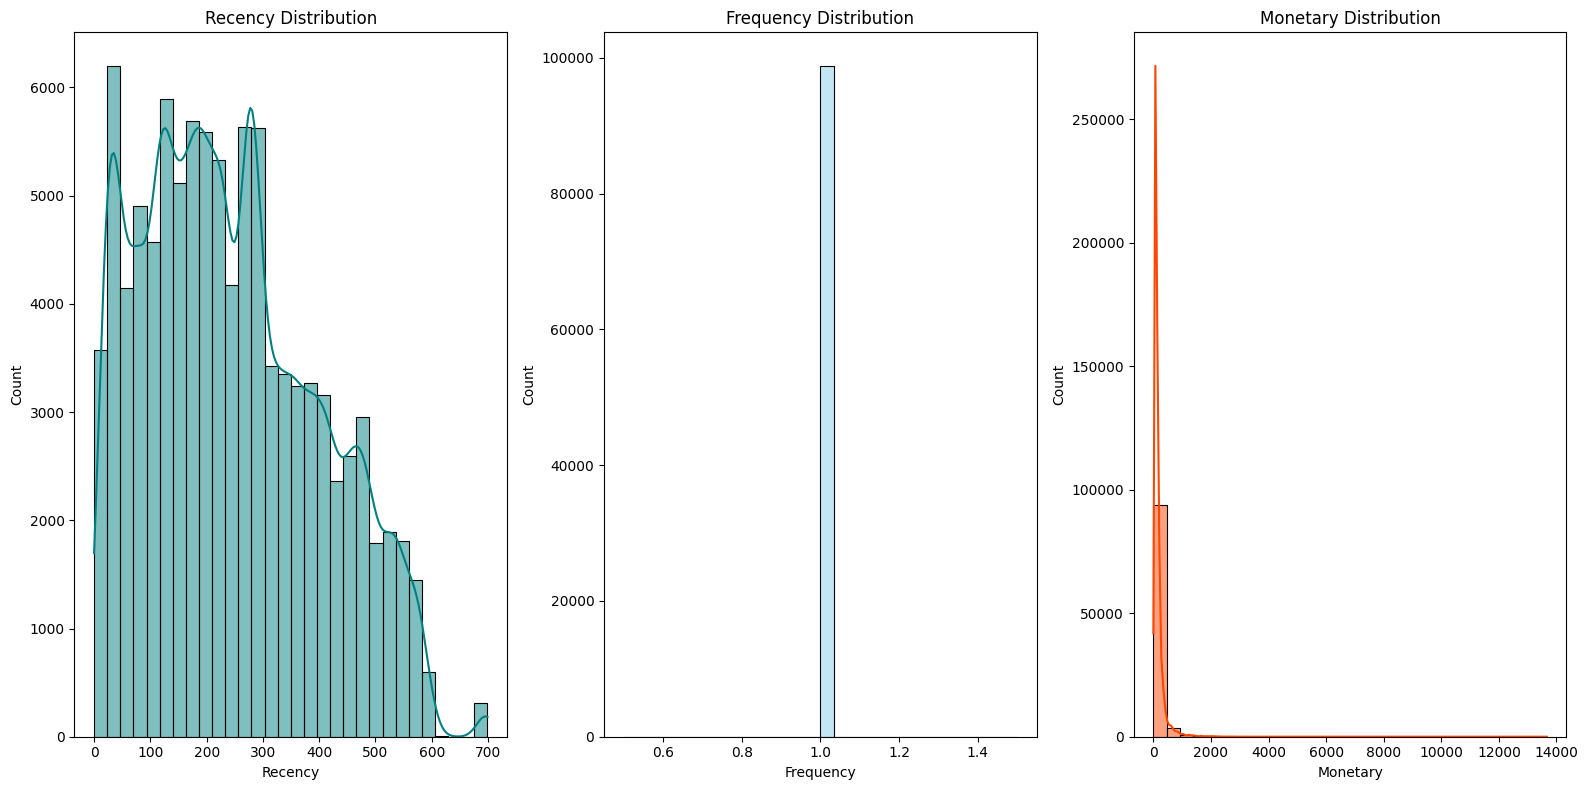

In [119]:
# Visualize RFM by histplot

fig, axes = plt.subplots(1, 3, figsize = (16, 8))

sns.histplot(rfm["Recency"], bins = 30, kde = True, ax = axes[0], color = "teal")
axes[0].set_title("Recency Distribution")

sns.histplot(rfm["Frequency"], bins = 30, kde = True, ax = axes[1], color = "skyblue")
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm["Monetary"], bins = 30, kde = True, ax = axes[2], color = "orangered")
axes[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()

In [120]:
# What does graph shows:
# Recency:
# - Most customer made their last purchase within 50-300 days
# - There is a gradual decline after 300 days
# - A small number of customer made very little or no purchase after 500+ days - shows a churn risk

# Frequency
# - Almost everyone has a frequency of 1 - shows no repeated buy
# - bar level spike at 1 shows no variation - low retention rate

# Monetary
# - Most customer spend BRL 500 , with a drop after that

/tmp/ipykernel_35/725055818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(["R_rank", "F_rank"]).size().unstack()


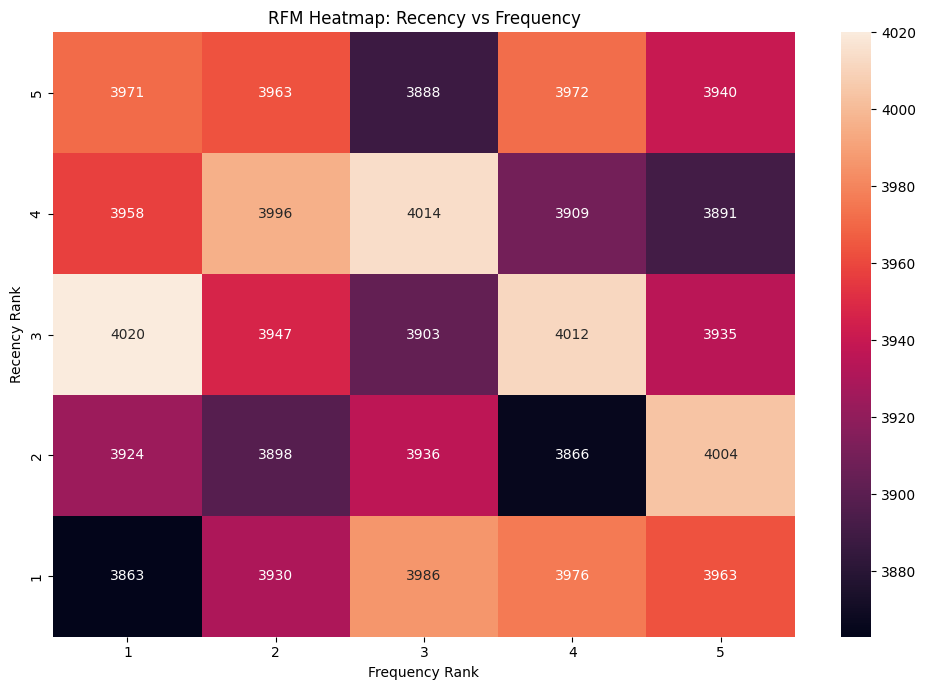

In [121]:
# Understand how recency and frequency interact
rfm_heatmap = rfm.groupby(["R_rank", "F_rank"]).size().unstack()

plt.figure(figsize = (10, 7))
sns.heatmap(
    rfm_heatmap,
    annot = True,
    fmt = ".0f"
)
plt.title("RFM Heatmap: Recency vs Frequency")
plt.xlabel("Frequency Rank")
plt.ylabel("Recency Rank")
plt.tight_layout()
plt.show()

In [122]:
# Analysis
# Recency Rank (1, 5)
# - 1 -> least recent - older purchase
# - 5 -> most recent purchases

# Frquency Rank (1, 5)
# - 1 -> least buyer
# - 5 -> buys very frequently

# R, F (5, 1) -> Very recent purchase but very low frequency - probably new customer
# R, F (1, 5) -> Long time ago but frequent buyer - possibly chured loyalist
# R, F (5, 5) -> Recent and frequent buyer - loyal champion customer
# R, F (1, 1) -> purchase long time ago and probably once - least important

/tmp/ipykernel_35/181105404.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap_2 = rfm.groupby(["R_rank", "M_rank"]).size().unstack()


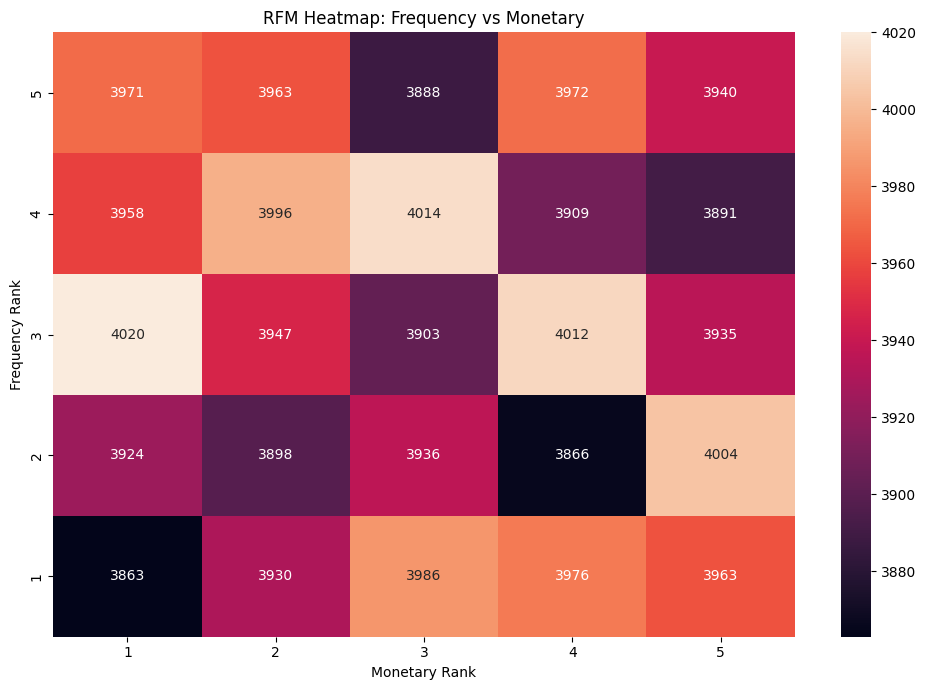

In [123]:
# Understand how frequency and moneytary interact
rfm_heatmap_2 = rfm.groupby(["R_rank", "M_rank"]).size().unstack()

plt.figure(figsize = (10, 7))
sns.heatmap(
    rfm_heatmap,
    annot = True,
    fmt = ".0f"
)
plt.title("RFM Heatmap: Frequency vs Monetary")
plt.xlabel("Monetary Rank")
plt.ylabel("Frequency Rank")
plt.tight_layout()
plt.show()

In [124]:
# Analysis
# Frquency Rank (1, 5)
# - 1 -> least buyer
# - 5 -> buys very frequently

# Monetary Rank (1, 5)
# - 1 -> spent most least amount of money
# - 5 -> spent the most


# F, M (5, 1) -> Buys frequently but spent less money on purchase
# F, M (1, 5) -> bought the least but spent big on small purchase
# F, M (5, 5) -> a important customer - buys frequently and spent big on every purchase
# F, M (1, 1) -> an least important customer - buys rarely and spent also less

In [125]:
rfm_data.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days_by_customer,delivery_days_estimated,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,15,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12,17,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,26,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,26,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,12,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,16,22,175.26
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,-1,25,65.95
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,9,21,75.16


In [126]:
# Top revenue generating products
revenue_merged_data = items_data.copy().merge(products_data.reset_index()[["product_id", "product_category_name"]], on="product_id", how = "left")
revenue_merged_data.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,telefonia
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96,fashion_calcados
5,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,817e1c2d22418c36386406ccacfa53e8,624f4ece8da4aafb77699233d480f8ef,2016-10-08 10:45:33,189.00,48.45,moveis_decoracao
6,c4b41c36dd589e901f6879f25a74ec1d,1,9e93b2c4cb5eea05e75a481c129b104d,ce27a3cc3c8cc1ea79d11e561e9bebb6,2016-10-08 13:26:12,9.90,8.72,automotivo
7,36989eb07a0de2d3d3129eea35553875,1,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,2016-10-08 13:46:32,23.90,26.82,moveis_decoracao
8,36989eb07a0de2d3d3129eea35553875,2,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,2016-10-08 13:46:32,23.90,26.82,moveis_decoracao
9,63638a6806d67773f3adba8534553fff,1,85b99d83c60cab5b4d8f927ad35212a1,b335c59ab742f751a85db9c411a86739,2016-10-08 13:47:45,67.90,18.98,moveis_decoracao


In [127]:
revenue_merged_data["revenue"] = revenue_merged_data["price"]

category_review = (
    revenue_merged_data.groupby("product_category_name")["revenue"]
    .sum()
    .sort_values(ascending = False)
)
category_review.head(5)

product_category_name
beleza_saude              1258681.34
relogios_presentes        1205005.68
cama_mesa_banho           1036988.68
esporte_lazer              988048.97
informatica_acessorios     911954.32
Name: revenue, dtype: float64

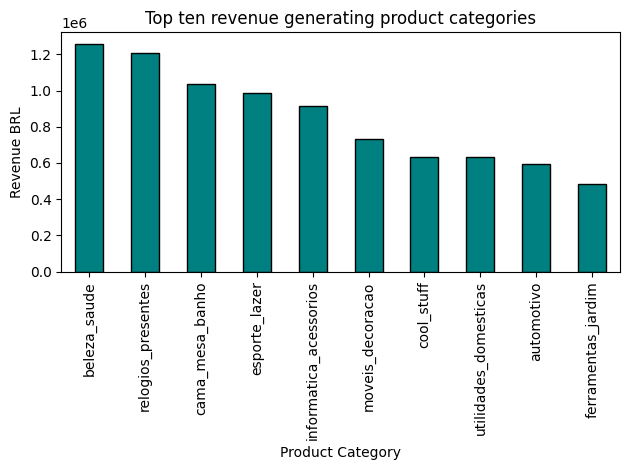

In [128]:
top_10_revenue_catgories = category_review.head(10)

top_10_revenue_catgories.plot(kind = "bar", color = "teal", edgecolor = "black")
plt.title("Top ten revenue generating product categories")
plt.xlabel("Product Category")
plt.ylabel("Revenue BRL")
plt.tight_layout()
plt.show()

In [129]:
delivered_orders = merge_with_orders_data[merge_with_orders_data["order_status"] == "delivered"]
revenue_merged_data = revenue_merged_data[revenue_merged_data["order_id"].isin(delivered_orders["order_id"])]
revenue_merged_data.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,revenue
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,44.99
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,44.99
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,44.99
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96,fashion_calcados,29.99
5,c3d9e402b6a0fbe2a5f7fc5b41117c38,1,817e1c2d22418c36386406ccacfa53e8,624f4ece8da4aafb77699233d480f8ef,2016-10-08 10:45:33,189.00,48.45,moveis_decoracao,189.00
6,c4b41c36dd589e901f6879f25a74ec1d,1,9e93b2c4cb5eea05e75a481c129b104d,ce27a3cc3c8cc1ea79d11e561e9bebb6,2016-10-08 13:26:12,9.90,8.72,automotivo,9.90
7,36989eb07a0de2d3d3129eea35553875,1,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,2016-10-08 13:46:32,23.90,26.82,moveis_decoracao,23.90
8,36989eb07a0de2d3d3129eea35553875,2,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,2016-10-08 13:46:32,23.90,26.82,moveis_decoracao,23.90
9,63638a6806d67773f3adba8534553fff,1,85b99d83c60cab5b4d8f927ad35212a1,b335c59ab742f751a85db9c411a86739,2016-10-08 13:47:45,67.90,18.98,moveis_decoracao,67.90
10,4d66b3a9d12facad48a3b23cc9fe7898,1,0c5801458e74f9b6c23b44c331426e30,e8f6dc8e6a1dcde89d20e3995c8d90b3,2016-10-08 14:09:08,89.90,17.51,cool_stuff,89.90


In [130]:
category_stats = (
    revenue_merged_data
    .groupby("product_category_name")
    .agg(total_revenue = ("revenue", "sum"), order_count = ("order_id", "nunique"))
    .sort_values("total_revenue", ascending = False)
)
category_stats.head(10)

,total_revenue,order_count
product_category_name,,
beleza_saude,1233131.72,8647
relogios_presentes,1166052.98,5493
cama_mesa_banho,1023102.77,9270
esporte_lazer,954783.57,7528
informatica_acessorios,888724.61,6530
moveis_decoracao,711323.19,6302
utilidades_domesticas,615628.69,5743
cool_stuff,609964.13,3556
automotivo,578966.65,3810


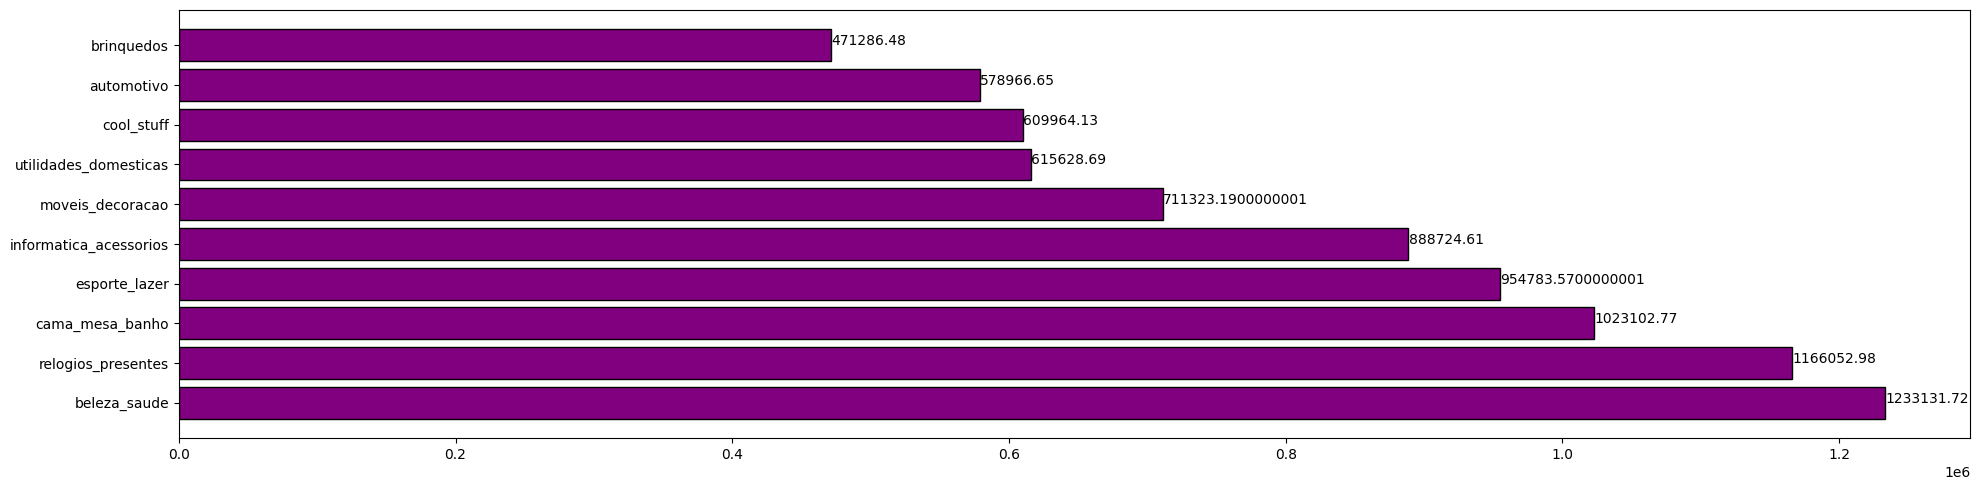

In [131]:
top_10_delivered_revenue_generator = category_stats.head(10)

plt.figure(figsize = (20, 5))
plt.barh(y = top_10_delivered_revenue_generator.index, width = np.floor(top_10_delivered_revenue_generator["total_revenue"]), color = "purple", edgecolor = "black")
for index, value in enumerate(top_10_delivered_revenue_generator["total_revenue"]):
    plt.text(value + 100, index, str(value))
plt.tight_layout()
plt.show()

In [132]:
# Cities/states with slowest or fastest delivery
delivered_df = merge_with_orders_data[(merge_with_orders_data["order_status"] == "delivered") & (merge_with_orders_data["delivery_days_by_customer"] > 0)].copy()


In [133]:
avg_delivery_by_city = (
    delivered_df.groupby("customer_city")["delivery_days_by_customer"]
    .mean()
    .sort_values()
)
avg_delivery_by_city.head(10).index

Index(['iomere', 'acucena', 'contenda', 'meridiano', 'siriji', 'moeda',
       'bento de abreu', 'pedra bela', 'sao joao da urtiga', 'agua doce'],
      dtype='object', name='customer_city')

In [134]:
avg_delivery_by_state = (
    delivered_df.groupby("customer_state")["delivery_days_by_customer"]
    .mean()
    .sort_values()
)
avg_delivery_by_state.head(10)

customer_state
SP     7.873094
PR    11.053668
MG    11.063812
DF    12.057260
SC    14.028079
RS    14.191440
GO    14.359916
RJ    14.372926
MS    14.595519
ES    14.768335
Name: delivery_days_by_customer, dtype: float64

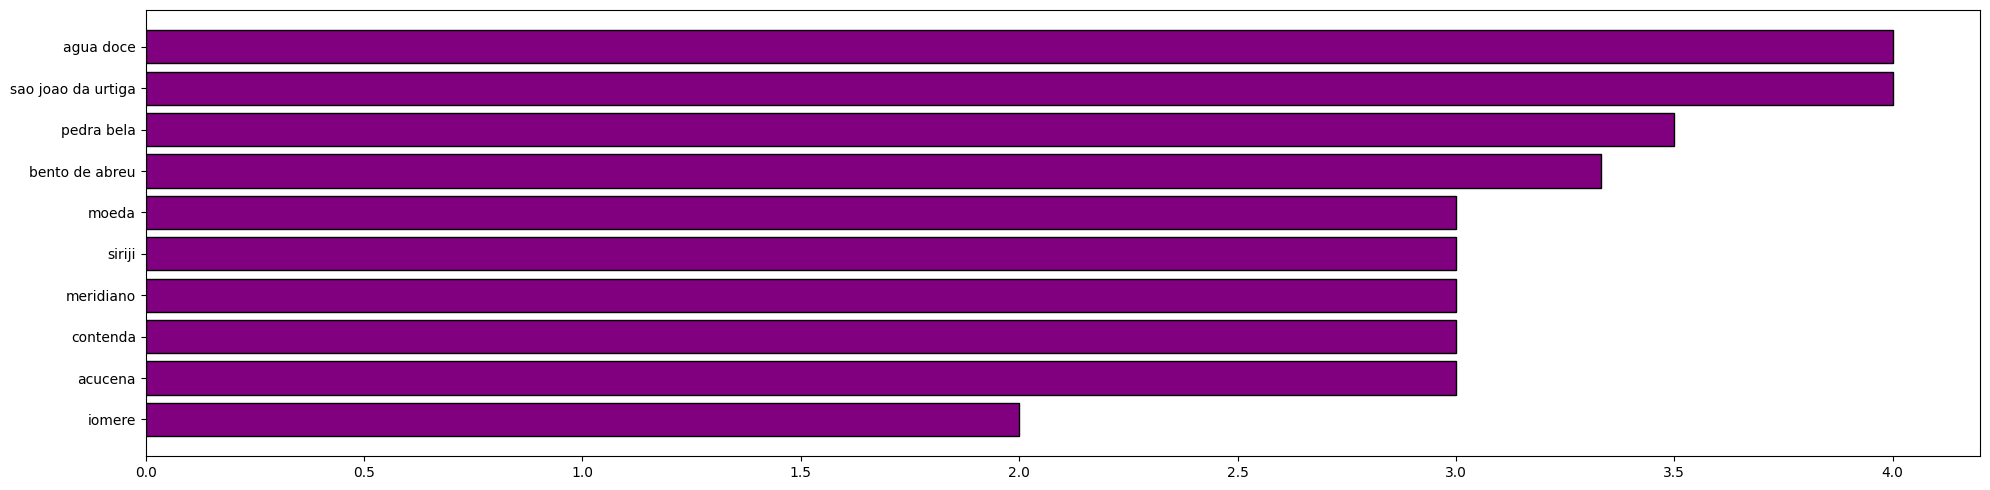

In [135]:
plt.figure(figsize = (20, 5))
plt.barh(y = avg_delivery_by_city.head(10).index, width = avg_delivery_by_city.head(10).values, color = "purple", edgecolor = "black")
plt.tight_layout()
plt.show()

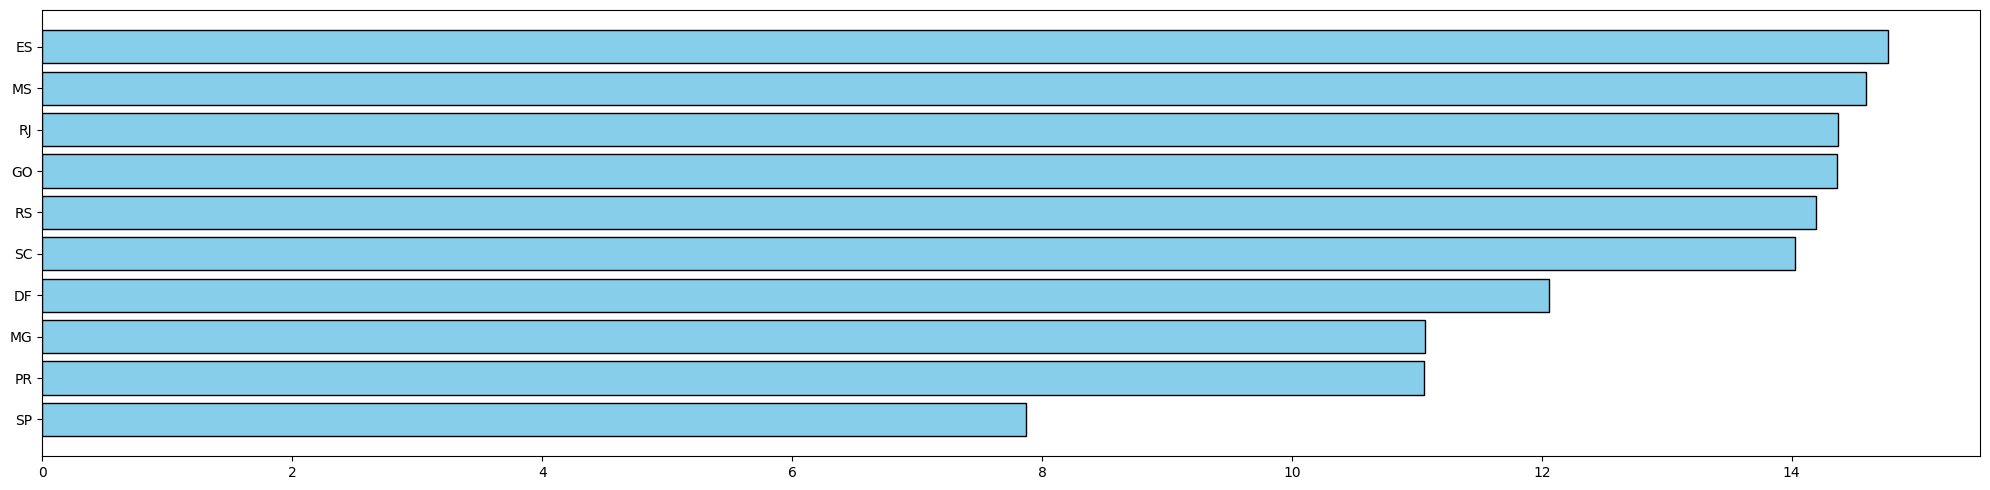

In [136]:
plt.figure(figsize = (20, 5))
plt.barh(y = avg_delivery_by_state.head(10).index, width = avg_delivery_by_state.head(10).values, color = "skyblue", edgecolor = "black")
plt.tight_layout()
plt.show()

In [137]:
payment_merged = (
    payments_data
    .merge(orders_data.reset_index()[["order_id", "customer_id"]], on = "order_id", how = "left")
    .merge(customer_data.reset_index()[["customer_id", "customer_state"]], on = "customer_id", how = "left")
)

payment_merged.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,SP
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,a24e6f72471e9dbafcb292bc318f4859,SP
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,206c0fcc717333d169ff95933fb47341,MG
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,4d7a9b8bba459dce09d1b8fa637a0cba,SP
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09,68c9dafdf193586c290b19c71541357a,PB
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95,c4e17eff78176dfe3401f03db0346f85,SP


In [138]:
payment_pref = payment_merged.groupby(["customer_state", "payment_type"]).size().reset_index(name = "count")
payment_pref

,customer_state,payment_type,count
0,AC,boleto,16
1,AC,credit_card,61
2,AC,debit_card,2
3,AC,voucher,5
4,AL,boleto,68
...,...,...,...
101,SP,voucher,2470
102,TO,boleto,76
103,TO,credit_card,196
104,TO,debit_card,4


In [139]:
payment_pivot = payment_pref.pivot(index = "customer_state", columns = "payment_type", values = "count").fillna(0)

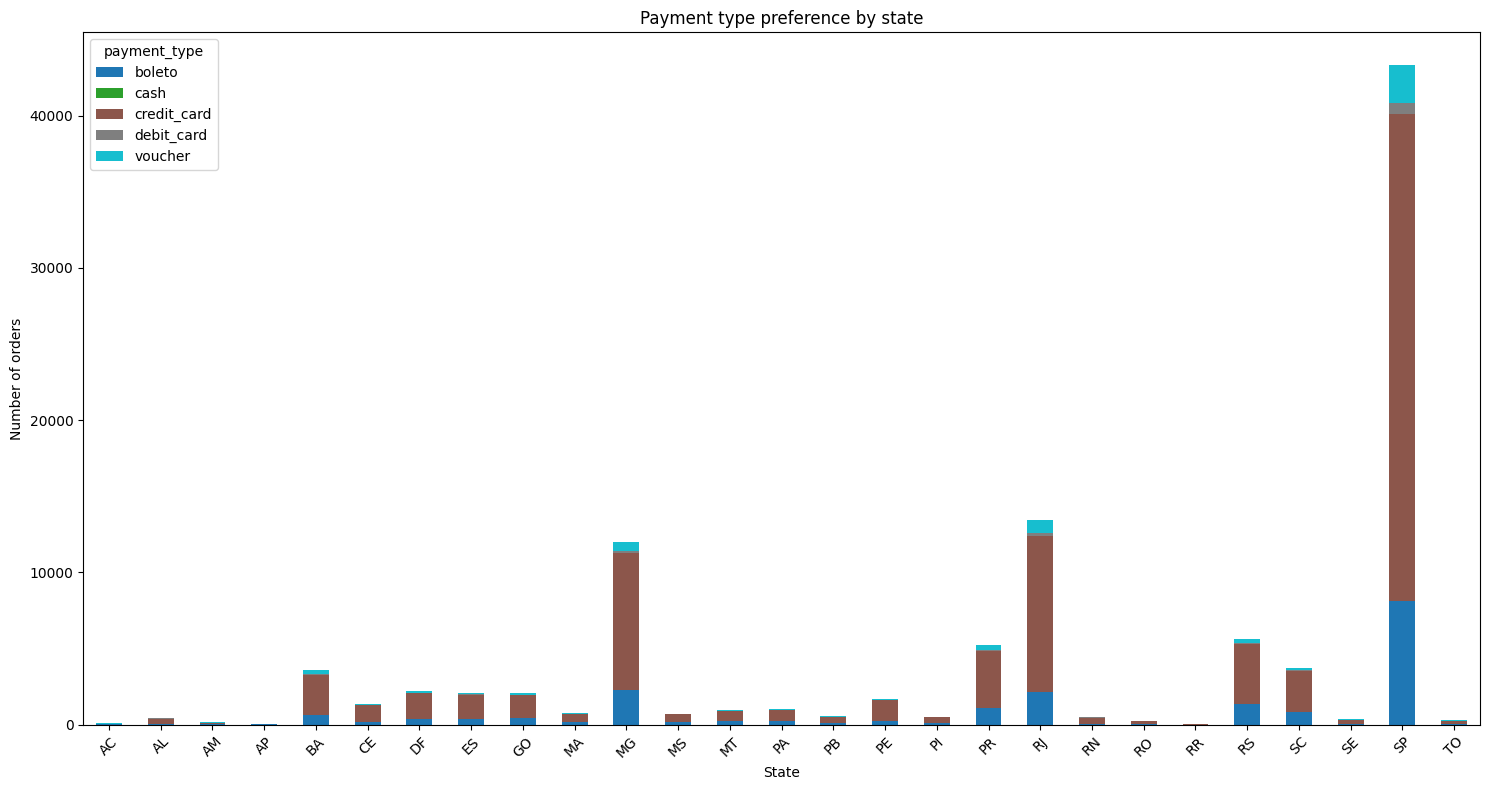

In [140]:
payment_pivot.plot(kind = "bar", stacked = True, figsize = (15, 8), colormap = "tab10")
plt.title("Payment type preference by state")
plt.ylabel("Number of orders")
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

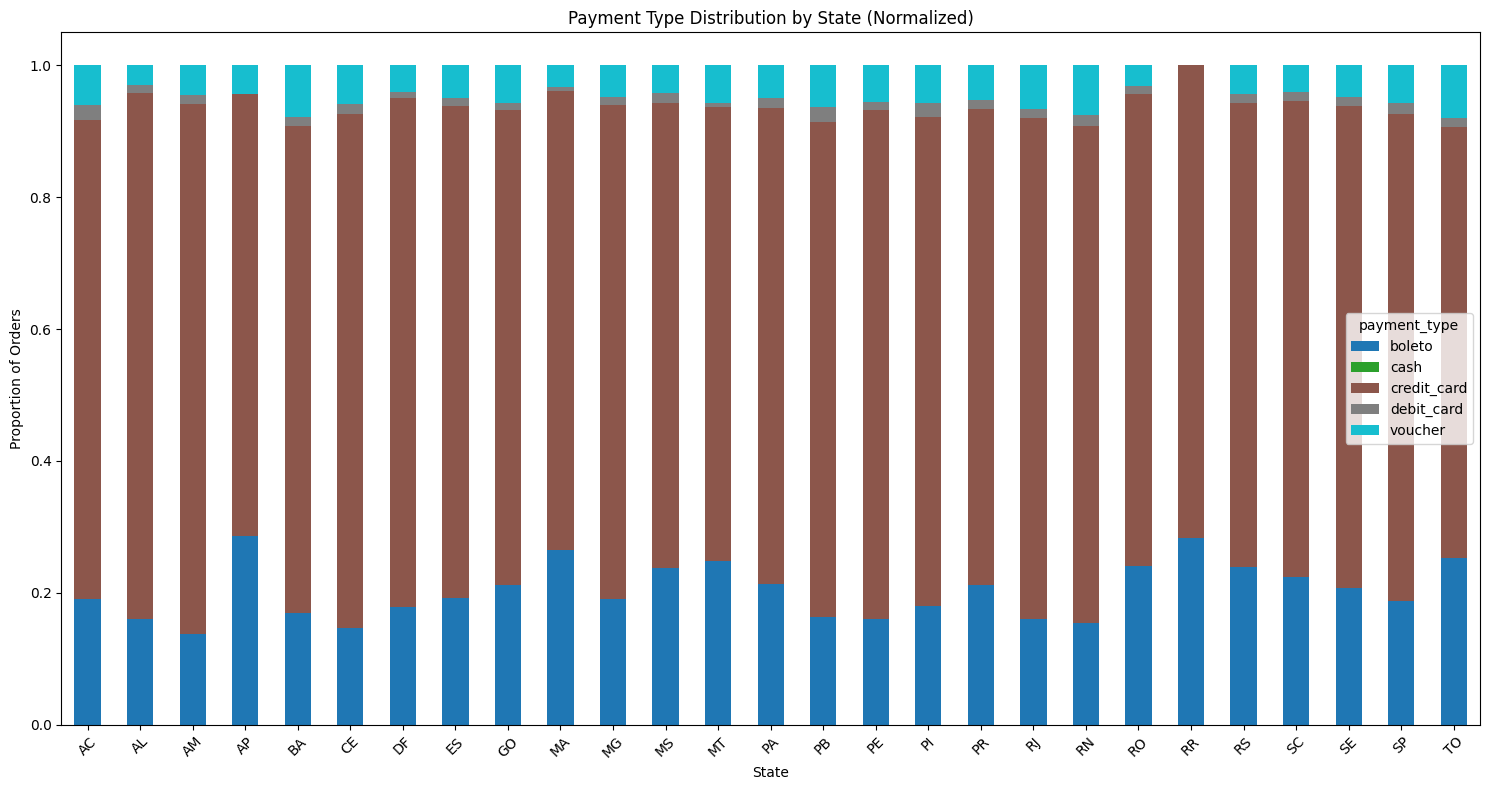

In [141]:
# Percentage breakdown per state
normalized = payment_pivot.div(payment_pivot.sum(axis = 1), axis = 0)
normalized.plot(kind = "bar", stacked = True, figsize = (15, 8), colormap = "tab10")
plt.title("Payment Type Distribution by State (Normalized)")
plt.ylabel("Proportion of Orders")
plt.xlabel("State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [189]:
# Delivery Time Prediction
features = ["customer_state", "payment_type", "product_category_name", "price", "freight_value", "order_purchase_timestamp"]
target = "delivery_days_by_customer"

In [190]:
DP_analasis_data = merge_with_orders_data.copy()[
    (merge_with_orders_data[target].notnull()) & 
    (merge_with_orders_data[target] > 0)
]

In [191]:
# Delivery Time Prediction
features_X = DP_analasis_data.copy()[features]
target = DP_analasis_data.copy()[target]

In [192]:
features_X.head(10)

,customer_state,payment_type,product_category_name,price,freight_value,order_purchase_timestamp
0,SP,credit_card,utilidades_domesticas,29.99,8.72,2017-10-02 10:56:33
1,SP,voucher,utilidades_domesticas,29.99,8.72,2017-10-02 10:56:33
2,SP,voucher,utilidades_domesticas,29.99,8.72,2017-10-02 10:56:33
3,BA,boleto,perfumaria,118.70,22.76,2018-07-24 20:41:37
4,GO,credit_card,automotivo,159.90,19.22,2018-08-08 08:38:49
5,RN,credit_card,pet_shop,45.00,27.20,2017-11-18 19:28:06
6,SP,credit_card,papelaria,19.90,8.72,2018-02-13 21:18:39
7,PR,credit_card,automotivo,147.90,27.36,2017-07-09 21:57:05
9,RJ,credit_card,automotivo,59.99,15.17,2017-05-16 13:10:30
10,RS,boleto,moveis_decoracao,19.90,16.05,2017-01-23 18:29:09


In [193]:
features_X["day"] = features_X["order_purchase_timestamp"].dt.day
features_X["month"] = features_X["order_purchase_timestamp"].dt.month
features_X["year"] = features_X["order_purchase_timestamp"].dt.year
features_X["dayofweek"] = features_X["order_purchase_timestamp"].dt.dayofweek

In [194]:
features_X.drop(columns = ["order_purchase_timestamp"], inplace = True)

In [195]:
target = DP_analasis_data["delivery_days_by_customer"]

In [196]:
categorical_features = ["customer_state", "payment_type", "product_category_name"]
numerical_features = ["price", "freight_value", "year", "month", "day"]

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ],
    remainder = "passthrough"
)

In [199]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_state',
                                                   'payment_type',
                                                   'product_category_name'])])),
                ('regressor', LinearRegression())])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(features_X, target, test_size = 0.2, random_state = 42)

In [201]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (92351, 9)
X_test shape: (23088, 9)
y_train shape: (92351,)
y_test shape: (23088,)


In [202]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [203]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test, y_pred)

In [204]:
print(f"mean squre error: {rmse}")
print(f"r2 score: {r2score}")

mean squre error: 8.763408421201257
r2 score: 0.1929383790934458


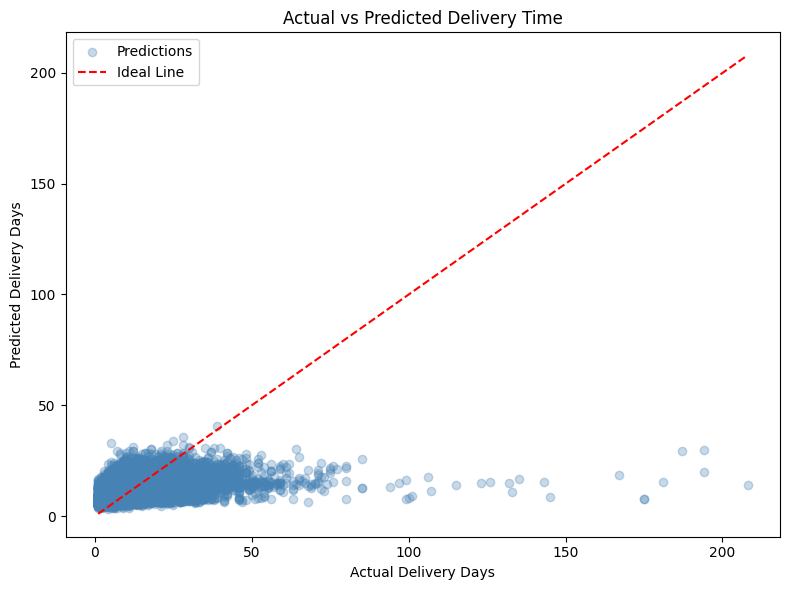

In [205]:
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="steelblue", label="Predictions")
plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Ideal Line")
plt.xlabel("Actual Delivery Days")
plt.ylabel("Predicted Delivery Days")
plt.title("Actual vs Predicted Delivery Time")
plt.legend()
plt.tight_layout()
plt.show()


In [206]:
# XGBoost Classifier 
def categories_delivery_times(days):
    if days <= 5:
        return 0
    elif days <= 10:
        return 1
    elif days <= 20:
        return 2
    else:
        return 3

DP_analasis_data["delivery_speed_category"] = DP_analasis_data["delivery_days_by_customer"].apply(categories_delivery_times)

In [207]:
# features_X["delivery_speed_category"] = DP_analasis_data["delivery_speed_category"]

In [208]:
features_X

,customer_state,payment_type,product_category_name,price,freight_value,day,month,year,dayofweek
0,SP,credit_card,utilidades_domesticas,29.99,8.72,2,10,2017,0
1,SP,voucher,utilidades_domesticas,29.99,8.72,2,10,2017,0
2,SP,voucher,utilidades_domesticas,29.99,8.72,2,10,2017,0
3,BA,boleto,perfumaria,118.70,22.76,24,7,2018,1
4,GO,credit_card,automotivo,159.90,19.22,8,8,2018,2
...,...,...,...,...,...,...,...,...,...
118276,SP,credit_card,bebes,174.90,20.10,6,2,2018,1
118277,BA,credit_card,eletrodomesticos_2,205.99,65.02,27,8,2017,6
118278,RJ,credit_card,informatica_acessorios,179.99,40.59,8,1,2018,0
118279,RJ,credit_card,informatica_acessorios,179.99,40.59,8,1,2018,0


In [209]:
categorical_features = ["customer_state", "payment_type", "product_category_name"]
numerical_features = ["price", "freight_value", "year", "month", "day", "dayofweek"]

In [211]:
target = DP_analasis_data["delivery_speed_category"]

In [214]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", xgb.XGBClassifier(use_label_encoder = False, eval_metric = "mlogloss", random_state = 42))
])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(features_X, target, test_size = 0.2, random_state = 42)

In [216]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_state',
                                                   'payment_type',
                                                   'product_category_name'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               ear...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [217]:
y_pred = model.predict(X_test)
y_pred

In [220]:
print("classification report")
print(classification_report(y_test, y_pred, target_names = ["Very Fast", "Fast", "Normal", "Slow"]))

classification report
              precision    recall  f1-score   support

   Very Fast       0.68      0.59      0.63      5262
        Fast       0.52      0.61      0.56      7903
      Normal       0.54      0.59      0.56      7185
        Slow       0.56      0.32      0.40      2738

    accuracy                           0.56     23088
   macro avg       0.58      0.53      0.54     23088
weighted avg       0.57      0.56      0.56     23088



In [221]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

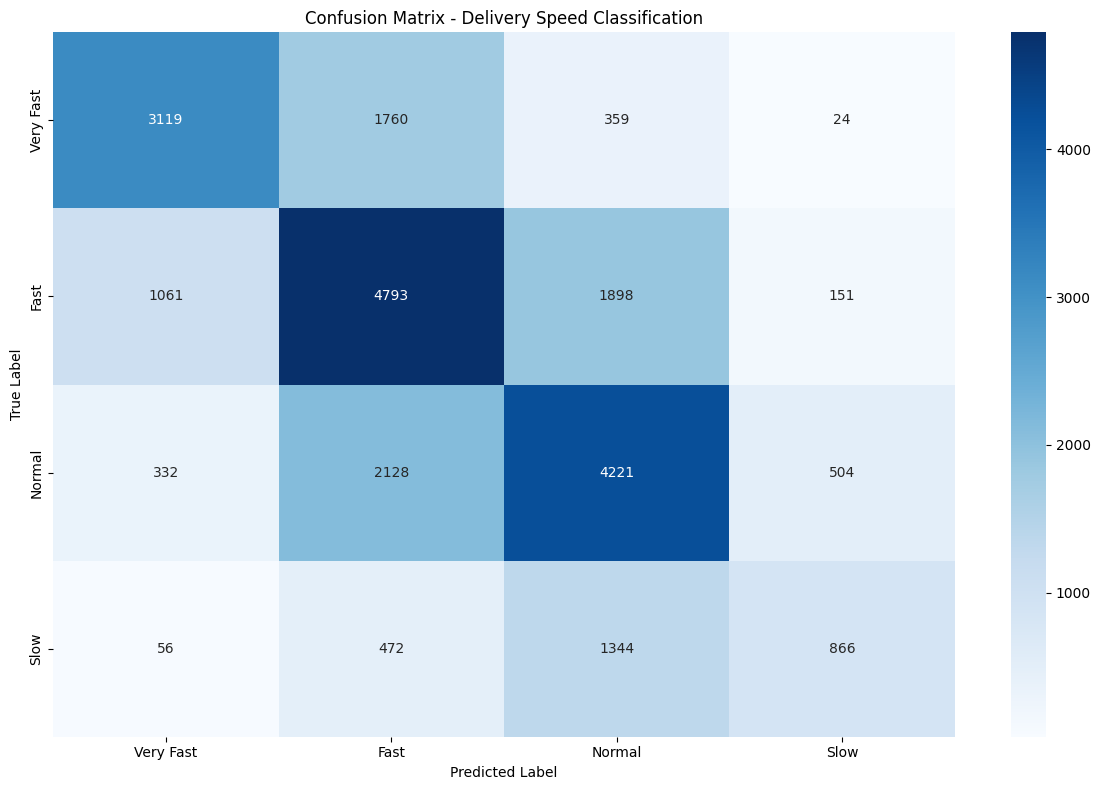

In [223]:
cm = confusion_matrix(y_test, y_pred)
class_names = ["Very Fast", "Fast", "Normal", "Slow"]

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = class_names, yticklabels = class_names)
plt.title("Confusion Matrix - Delivery Speed Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()